# 금융 특성 공학: 알파 팩터 리서치

- 알고리즘 트레이딩 전략은 벤치마크 대비 양의 수익률을 내고자 언제 자산을 매수해야 하는지, 매해야 하는지를 가리키는 신호에 의해 결정됨
- 벤치마크에 대한 노출에 의해 설명되지 않는 자산의 수익률 부분을 알파(alpha)라 부르기 때문에 이 신호를 알파 팩터(alpha factor)라고 한다.

- 4장에서 다루는 내용
    - 존재하는 팩터의 범주, 작동 이유, 측정 방법
    - 넘파이, 판다스, TA-Lib를 사용한 알파 팩터 생성
    - 웨이블릿과 칼만 필터를 사용해 데이터 잡음을 제거하는 방법
    - 오프라인 및 퀀토피안 플랫폼에서 집라인을 사용해 개별 및 다중 알파 팩터 테스트
    - 여러 척도 중 정보 계수(IC)를 사용한 예측 성과 및 회전율을 평가하는 방법

### 알파 팩터 실무: 데이터부터 신호까지
- 알파 팩터는 자산 가격 움직임을 예측하는 것을 목표로 하는 원시 데이터의 변환임 (자산 수익률을 높이는 리스크를 포착하게 설계)
- 팩터는 하나 또는 여러 개의 입력 변수를 결합하지만 전략이 팩터를 평가할 때는 언제나 각 자산에 대해 단일 값을 취한다.

- 알파 팩터의 설계, 평가 , 조합은 알고리즘 거래 전략 워크플로의 연구 스텝에서 중요한 스텝이다.  
  
<img src='./img/4-1.png'></img>


- 알파 팩터 공학
    - 알파 팩터 : 예측 신호를 포함한 시장 데이터, 기본적 데이터와 대체 데이터를 변환한 것 (성장률, 물가 상승률, 변동성, 생산성과 인구 통계적 리스트와 같은 기본적인 경제 전반의 거시 경제 데이터, 가치-성장 투자 및 모멘텀 등등)
        - "변수의 시간에 따른 절대적 또는 상대적 변화"
        - "데이터 시리즈 간의 비율"
        - "단순 또는 지수 이동 평균과 같은 일정 기간 동안의 합계와 같은 단순한 산술적 연산"
        - "공급에 대한 수요의 상대 강도 지표(relative strength index)"과 같은 가격과 거래량 패턴의 기술적 분석 및 증권의 기본적 분석에서 등장하는 척도들
        - 기본 또는 대체 데이터를 변환함으로써 생성


### 수십 년 간의 팩터 리서치를 바탕으로 구축
- 이상적인 세계에서 리스크 팩터는 상호 독립적이고, 양의 리스크 프리미엄을 창출하고, 리스크의 모든
-  차원을 생성해 완전한 집합을 형ㅅ어하고, 주어진 자산군의 자산의 체계적 리스크를 설명할 수 있어야 함
  
- 모멘텀과 심리: 추세는 당신의 친구다
    - 모멘텀 투자는 가장 잘 정립된 팩터 전략 중 하나
    - 모멘텀 팩터는 일정 기간에 걸쳐 성과가 좋은 자산들은 매수(long)하고 동기간에 성과가 안 좋은 잣나들은 공매도(shot)하게 설계됨
    - 모멘텀 전략의 전제는 "자산 가격이 양의 시계열 상관관계로 반영되는 추세를 보인다는 것"  
      
      
- 모멘텀과 심리가 초과 수익률을 낳는 이유
    - 모멘텀 효과의 이유는 투자자의 행동, 지속적인 수요와 공급의 불균형, 리스크 자산과 경제와의 양의 피드백 루프 또는 시장 미시 구조를 가리키고 있다.
        - 행동 경제학적 이유  
            : 투자자들이 새로운 정보를 상이한 속도로 소화하면서 나타나는 시장 뉴스에 대한 과소 반응과 과대 반응의 바이어스(bias)를 반영
        - 시장 미시 구조  
            : 투자자들이 그들의 편향을 모방하는 전략을 구현함에 따라 가격 모멘텀을 일으킨다.


    - 모멘텀과 심리를 측정하는 방법
        - 모멘텀 팩터는 추세와 패턴을 식별함으로써 전통적으로 가격 시계열의 변화에서 도출이 된다.
        - 전통 자산군 내 또는 전통 자산군 간에, 그리고 여러 기간에서 자산을 횡단면적으로 비교하거나 자산의 시계열을 분석함으로써 절대적 수익률이나 상대적 수익률을 기반으로 구축될 수 있다.<br></br>
        1. 상대 강조 지수(RSI, Relative Strength Indicator)  
            : RSI는 최근 가격 변화를 종목 간 비교해 과매수 또는 과매도된 종목을 확인한다.  
            : RSI >= 70 이면 과매수, RSI <= 30 이면 과매도
            : 상승 가격 변화와 하락 가격 변화로 주어진 수(보통 14일)의 과거 매매일수에 대해 구한 각각의 평균 가격 변화를 사용해 다음을 계산한다.

        2. 가격 모멘텀  
            : 이 팩터는 주어진 과거 거래일수에 대한 총 수익률을 계산한다. 학계에서는 일반적으로 가장 최근 가격 흐름에서 흔히 관찰되는 단기 반전 효과를 고려해 가장 최근 1달을 제외한 과거 12개월을 사용한다. 하지만 더 짧은 기간들도 많이 사용된다.

        - 변동성 조정 12개월 가격 모멘텀  
            : 변동성 팩터를 조정한 12개월 가격 모멘텀은 수익률을 표준 편차로 나눔으로써 과거 12개월의 총 수익률을 정규화한다.

        - 가격 가속도(preice acceleration)
            : 가격 가속도는 장기와 단기(예를 들면 1년과 3개월의 거래일)에 대한 일일 가격에 대한 선형 회귀식을 이용해(변동성이 조정된) 추세의 기울기를 꼐산하고, 가격 가속도의 척도로 기울기의 변화를 계산한다.

        - 52주 최고가 대비 변화율
            - 이 팩터는 52주 동안 가장 최근 가격과 가장 높은 가격 간의 % 차이를 사용한다.
            
    - 추가적인 심리 지표
        - 이익 추정수  
            : 애널리스트 커버와 정보 불확실성의 대체적 척도로서 컨센서스 추정치의 수로 사용해 주식의 순위를 매긴다. 높은 값이 더 바람직  
        - N개월간 종목 추천의 변화  
            : 과거 N개월간의 컨센서스 추천의 변화로 주식의 순위를 매김. 강한 매도에서 매도 또는 매수에서 강한 매수 등 개선된 경우를 바람직한 것으로 봄
        -  12개월 발생 주식수의 변화  
            : 과거 12개월 동안 분할 조정된 발행 주식수의 변화를 측정함 (음의 변화는 자사주 매입을 의미 / 좋음)
        - 6개월간 목표 주가의 변화  
            : 평균 애널리스트의 목표 가격에 대한 6개월간 변화를 추적하는데, 양의 변화가 더 클수록 자연스럽게 더 바람직
        - 순이익의 조정  
            : 이익 추정치에 대한 상향 조정과 하향 조정의 차이를 총조정수의 %로 표현
        - 발행 주식 대비 대차 잔고 비율  
            : 현재 공매도가 돼 있는 주식, 즉 투자자가 미래에 주가가 떨어질 것이라고 예상하고 주식을 차입해 매도하고 이후 다시 매입할 주식의 발행 주식 대비 %를 측정  
            : 높은 수준의 공매도 비율은 시장심리를 나타내며 앞으로 성과가 나쁠 것이라는 신호로 간주함
<br></br>
<br></br>
- 가치 팩터(Value Factor)
    - 기본적 가치보다 상대적으로 낮은 가격을 가진 주식은 시가 가중 벤치마크를 초과하는 수익률을 가져다줌
    - 가치 팩터(Value Factor)는 이러한 상관관계를 나타내며 상대적으로 저렴한 과소평가된 자산을 매수하는 신호를 제공하고, 과대평가된 자산에 대해 매도 신호를 제공하도록 설계된다.
    
    - 상대적 가치 전략
        - 자산의 공정 가치에 대한 가격의 평균 회귀에 의존한다.
        - 가치주는 종종 평균 회귀에 의존하므로 모멘텀 팩터의 속성과는 반대의 속성을 보인다.
        - 가치주와 반대되는 개념 => 성장주(성장 예상으로 인해 고평가된 주식)
    
- 기본적 가치 전략
    - 기본적 가치 전략은 목표 자산군에 따라 관련된 경제적 및 기본적 지표들로부터 공정 자산 가치를 도출한다.
    - 채권, 통화, 상품의 경우 지표 -> (자본 수지의 수준과 변화, 경제 활동, 인플레이션 또는 자금 흐름 등 ...)

- 시장 가치 전략
    - 시장 가치 전략은 통계적 모델이나 머신러닝 모델을 사용해 유동성 공급의 비효율성으로 인해 왜곡된 가격을 찾는 것
    - 통계적 및 인덱스 차익 거래는 단기간의 일싲거인 시장 충격의 반전을 찾는, 잘 알려진 예이다.
    - 좀 더 장기적인 시장 가치 트레이드는 주식과 상품에 있어 계절적 효과를 이용한다.

- 자산간 상대 가치 전략
    - 자산 간 상대 가치 차익 거래는 자산 클래스 간 상대적 가격 왜곡에 초점을 맞춘다.
    - 상대 가치는 신용 신호를 이용해 주식을 거래하는 신용과 주식 변동성 간의 거래, 상품과 관련 주식 간의 거래를 포함한다.

    - 가치 팩터가 수익률을 예측하는 데 도움이 되는 이유
        - 가치 효과에서 성장주 포트폴리오는 기본적 가치에 비해 낮은 시장 가치를 가짐
        - 가치주 포트폴리오는 기본적 가치 대비 높은 시장 가치를 가짐

        - 합리성을 기반을 둔 효율적 시장 견해에서 가치 프리미엄은 더 높은 실제 또는 인지되는 리스크를 보상함
    
    - 가치 효과를 포착하는 방법
        - 수많은 가치 대리 지표가 기본 데이터로부터 계산되어 나옴
        - 이 팩터들이 머신러닝 가치 평가 모델의 입력으로 결합돼 자산 가격을 예측한다.

        - 팩터의 종류 (171p~172p)
            1. 현금 흐름 수익률
            2. 잉여 현금 흐름 수익률
            3. 투하 자본에 대한 현금 흐름 수익률(CFROIC)
            4. 총자산 대비 현금 흐름
            5. 가업 가치 대비 현금 흐름
            6. 기업 가치 대비 EBITDA
            7. 이익 수익률(최근 1년)
            8. 이익 수익률(미래 1년)
            9. PEG 비율
            10. 섹터 대비 P/E(1년 미래)
            11. 매출 수익률
            12. 매출 수익률(FY1)
            13. 장부 가치 수익률
            14. 배당 수익률


- 변동성과 규모 이례 현상
    - 규모 효과(size effect)
        - 낮은 시가 총액 주식의 초과성과 관련 있음
        - 저변동성 팩터(lower volatility factor)는 평균 이하의 변동성, 베타 또는 특이 리스크로 주식의 초과 수익률을 포착
        - 시장 가치가 큰 주식은 변동성이 낮은 경향이 있어, 흔히 전통적인 규모 팩터(size factor)는 더 최근의 변동성 팩터와 결합됨

    - 저변동성 이례 현상  
        : 금융의 기본원리에 반하는 경험적 퍼즐임  
        : 자본 자산 가격 모델(CAPM, Captial Asset Pricing Model)과 다른 가격 결정 모델에 의하면 높은 리스크는 높은 수익률을 얻어야만함  
        : 하지만 많은 시장에서 상당 기간에 걸쳐 리스크가 낮은 자산들이 높은 자산보다 성과가 좋은 반대 현상이 관찰됨  

    - 변동성과 규모가 수익률을 예측하는 이유  
        - 복권 효과(lottery effects)  
            : 개인들이 작은 기대 손실로 성공 확률이 매우 작더라도 성공 시 큰 이익을 보는 복권과 유사한 베팅을 취한다는 경험적 증거에 근거  
            : 편향된 선호로 말미암아 높은 변동성을 가진 주섹에 대해 높은 가격을 지불하고, 낮은 변동성을 지닌 주식에 대해 낮은 가격을 지불함

        - 대표 현향(representation bias)  
            : 투자자들이 일부 매우 유명한 변동성 높은 주식의 성공을 모든 변동성이 높은 주식에 외삽하고,  
            : 반면 이런 주식들의 투기적 특성을 무시한다는 것을 의미함  
    - 주요 척도
        - 저변동성을 식별하는 데 사용되는 척도는 한편으로는 실현 변동성(표준 편차),
        - 다른 한편으로는 예측(내재) 변동성과 상관관계를 포함하는 과업ㅁ위한 스펙트럼을 커버한다.

>>> 투자자들은 호황기와 위기 시에 다르게 행동한다.  
>>> 호황기 시장에서 베타의 차이는 크지 않으므로 저변동성 주식들의 성과는 고변동성 주식들에 비해 상대적으로 결코 나쁘지 않은 반면  
>>> 위기 시에는 고변동성 자산의 베타가 더욱 증가하고, 투자자들은 저변동성 주식을 찾거나 계속 보유하므로 베타 차이는 더 증가한다.  
>>> 결과적으로 저변동성 자산과 포트폴리오는 장기적으로 고변동성 자산과 포트폴리오에 비해 더 좋은 성과를 보인다.  

- 우량주 팩터
    - 우량주 팩터(quality factor)는 수익성, 운영 효율성, 안정성, 안정성 및 좋은 지배 구조 등 간단히 말해 시장 대비 우량한 기업에 대한 초과 수익을 포착하는 것을 목표로 함
    - 시장 역시 상대적으로 이익 확실성이 큰 주식을 보상하고 이익 변동성이 큰 주식을 저평가함
    - 우량주 팩터에만 의존하는 전략은 하방 리스크를 최소화하려고 프리미임을 지불하면서 가치를 올리므로 경기와 반대의 성과를 보이는 경향이 있음
    - 우량주 팩터는 멀티팩터 전략에서 종종 다른 리스크 팩터, 특히 가치 팩터와 결합해 투자 전략의 질을 향상시킬 수 있다.
    - 롱/숏 우량주 전략은 저변동성을 보이는 우량주에 대해 롱을 취하고, 고변동성의 비우량주에 대해 숏을 취하므로 음의 시장 베타를 갖게 되는 경향이 있음
    - 우량주 팩터는 종종 저변동성과 모멘텀 팩터와 양의 상관관계를 가지며, 가치나 시장 노출과는 음의 상관관계를 갖는다.


    - 우량주 팩터가 중요한 이유
        - 지속성 이익성, 현금 흐름의 안정적 성장, 적절한 레버리지, 낮은 자본 시장 의존도, 낮은 재무 리스크와 같은 우수한 기업 특성이 주식에 대한 수요를 받치고 장기적으로 가격을 지지하므로 초과 성과를 나타냄
        - 기업 재무 관점에서 우량주는 흔히 자본을 사려 깊게 관리하고, 과다한 레버리지나 과다한 자본화의 리스크를 감소시킨다.

        - 펀드 매니저는 변동성이 더 큰(위험한) 가치주보다 가격이 비싸더라도 강한 기본을 가진 기업을 사는 것이 정당화하기 더 용이하다고 생각함

    - 주요 척도
        - 우량주 팩터는 대차대조표(balance sheet), 손익 계산서(ncome statement)에서 계산된 높은 이익이나 현금 흐름 마진에 반영된 수익성, 운영 효율성, 재무 건전성, 더 크게는 시간에 따른 수익성 지위를 유지하는 능력을 나타내는 경쟁력들을 가리키는 척도에 의존함

        - 우량성은 매출 총이익(gross profitability), 투자 자본 수익률(return on invested capital), 저이익 변동성(low earning voldability), 다양한 수익성, 이익의 질과 레버리지 척도의 결합을 사용해 측정됐다. 

        * 자산 회전율 (Asset Turnover)  
            : 기업이 매출을 올리려고 필요로 하는 자산을 얼마나 효율적으로 사용하는지를 측정하는데, 매출을 총자산으로 나눈다. (높을 수록 좋음)
        * 자산 회전율의 12개월간 변화  
            : 매출을 올리기 위한 자산의 사용에 있어서의 경영 효율성의 과거 1년 동안의 변화로, 가장 높은 수준의 효율성 개선을 보인 주식의 성과가 전형적으로 다른 주식의 성과를 초월함
        * 유동 비율(Current Ratio)  
            : 유동 비율은 회사가 단기 부채를 갚을 수 있는 능력을 측정하는 유동성 척도 (유동 부채에 대해 유동 사잔을 비교하며 높을 수록 우량주라고 할 수 있음)  
        * 이자 보상 비율(Interest Coveragae)  
            : 기업이 부채에 대한 이자를 얼마나 용이하게 갚을 수 있는지를 측정  
            : 기업의 이자, 세금 전 이익(EBIT, Earnings Before Interest and Taxes)을 이자 비용으로 나눔으로써 계산 (높을 수록 좋음)
        * 레버리지(leverage)
            : 자기 자본보다 부채를 현저히 많이 갖고 있는 기업은 높은 레버리지를 갖고 있다고 간주됨  
            : 부채-자기 자본 비율은 전형적으로 전망과 역의 관계를 갖고 있어서 낮을 수록 좋음
        * 배당 성향(Payout ratio)
            : 주주에게 배당으로 지급하는 이익의 부분  
            : 높은 배당 성향을 가진 주식은 상위 분위수에 할당되며, 낮은 배당 성향을 가진 주식은 하위 분위수에 할당됨
        * 자기 자본 이익률(ROE, Return On Equity)
            : ROE는 자기 자본 대비 순이익의 비율로 계산됨  
            : 높은 ROE를 가진 주식이 순위가 높게 매겨짐


            

- 수익률을 예측한느 알파 팩터 공학
    - 주요 팩터 범주, 그들의 논리와 인기 있는 척도의 개념적 이해를 기반으로 하는 핵심 작업은 과거의 제시된 수익률 동인에 의해 구체화된 리스크를 좀 더 잘 포착하는 새로운 팩터를 확인하거나 발견하는 것
    - 데이터를 팩터로 변환하는 것을 용이하게 하는 핵심 도구
        * python pandas & numpy
        * python warrper TA-Lib

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os
from pathlib import Path
import quandl
import seaborn as sns
from pandas_datareader.famafrench import get_available_datasets
from pyfinance.ols import PandasRollingOLS
from sklearn.feature_selection import mutual_info_classif


# How to transform data into factors

Based on a conceptual understanding of key factor categories, their rationale and popular metrics, a key task is to identify new factors that may better capture the risks embodied by the return drivers laid out previously, or to find new ones. 

In either case, it will be important to compare the performance of innovative factors to that of known factors to identify incremental signal gains.

We create the dataset here and store it in our [data](../data) folder to facilitate reuse in later chapters.

## Imports & Settings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline

from datetime import datetime
import pandas as pd
import pandas_datareader.data as web

# replaces pyfinance.ols.PandasRollingOLS (no longer maintained)
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style('whitegrid')
idx = pd.IndexSlice

## Get Data

The `assets.h5` store can be generated using the the notebook [create_datasets](../data/create_datasets.ipynb) in the [data](../data) directory in the root directory of this repo for instruction to download the following dataset.

We load the Quandl stock price datasets covering the US equity markets 2000-18 using `pd.IndexSlice` to perform a slice operation on the `pd.MultiIndex`, select the adjusted close price and unpivot the column to convert the DataFrame to wide format with tickers in the columns and timestamps in the rows:

Set data store location:

In [ ]:
DATA_STORE = '../data/assets.h5'

In [ ]:
START = 2000
END = 2018

In [ ]:
with pd.HDFStore(DATA_STORE) as store:
    prices = (store['quandl/wiki/prices']
              .loc[idx[str(START):str(END), :], 'adj_close']
              .unstack('ticker'))
    stocks = store['us_equities/stocks'].loc[:, ['marketcap', 'ipoyear', 'sector']]

In [ ]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4706 entries, 2000-01-03 to 2018-03-27
Columns: 3199 entries, A to ZUMZ
dtypes: float64(3199)
memory usage: 114.9 MB


In [ ]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6834 entries, PIH to ZYME
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   marketcap  5766 non-null   float64
 1   ipoyear    3038 non-null   float64
 2   sector     5288 non-null   object 
dtypes: float64(2), object(1)
memory usage: 213.6+ KB


### Keep data with stock info

Remove `stocks` duplicates and align index names for later joining.

In [ ]:
stocks = stocks[~stocks.index.duplicated()]
stocks.index.name = 'ticker'

Get tickers with both price information and metdata

In [ ]:
shared = prices.columns.intersection(stocks.index)

In [ ]:
stocks = stocks.loc[shared, :]
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2412 entries, A to ZUMZ
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   marketcap  2407 non-null   float64
 1   ipoyear    1065 non-null   float64
 2   sector     2372 non-null   object 
dtypes: float64(2), object(1)
memory usage: 75.4+ KB


In [ ]:
prices = prices.loc[:, shared]
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4706 entries, 2000-01-03 to 2018-03-27
Columns: 2412 entries, A to ZUMZ
dtypes: float64(2412)
memory usage: 86.6 MB


In [ ]:
assert prices.shape[1] == stocks.shape[0]

## Create monthly return series

To reduce training time and experiment with strategies for longer time horizons, we convert the business-daily data to month-end frequency using the available adjusted close price:

In [ ]:
monthly_prices = prices.resample('M').last()

To capture time series dynamics that reflect, for example, momentum patterns, we compute historical returns using the method `.pct_change(n_periods)`, that is, returns over various monthly periods as identified by lags.

We then convert the wide result back to long format with the `.stack()` method, use `.pipe()` to apply the `.clip()` method to the resulting `DataFrame`, and winsorize returns at the [1%, 99%] levels; that is, we cap outliers at these percentiles.

Finally, we normalize returns using the geometric average. After using `.swaplevel()` to change the order of the `MultiIndex` levels, we obtain compounded monthly returns for six periods ranging from 1 to 12 months:

In [ ]:
monthly_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 219 entries, 2000-01-31 to 2018-03-31
Freq: M
Columns: 2412 entries, A to ZUMZ
dtypes: float64(2412)
memory usage: 4.0 MB


In [ ]:
outlier_cutoff = 0.01
data = pd.DataFrame()
lags = [1, 2, 3, 6, 9, 12]
for lag in lags:
    data[f'return_{lag}m'] = (monthly_prices
                           .pct_change(lag)
                           .stack()
                           .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                  upper=x.quantile(1-outlier_cutoff)))
                           .add(1)
                           .pow(1/lag)
                           .sub(1)
                           )
data = data.swaplevel().dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 399525 entries, ('A', Timestamp('2001-01-31 00:00:00', freq='M')) to ('ZUMZ', Timestamp('2018-03-31 00:00:00', freq='M'))
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   return_1m   399525 non-null  float64
 1   return_2m   399525 non-null  float64
 2   return_3m   399525 non-null  float64
 3   return_6m   399525 non-null  float64
 4   return_9m   399525 non-null  float64
 5   return_12m  399525 non-null  float64
dtypes: float64(6)
memory usage: 19.9+ MB


## Drop stocks with less than 10 yrs of returns

In [ ]:
min_obs = 120
nobs = data.groupby(level='ticker').size()
keep = nobs[nobs>min_obs].index

data = data.loc[idx[keep,:], :]
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 360752 entries, ('A', Timestamp('2001-01-31 00:00:00', freq='M')) to ('ZUMZ', Timestamp('2018-03-31 00:00:00', freq='M'))
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   return_1m   360752 non-null  float64
 1   return_2m   360752 non-null  float64
 2   return_3m   360752 non-null  float64
 3   return_6m   360752 non-null  float64
 4   return_9m   360752 non-null  float64
 5   return_12m  360752 non-null  float64
dtypes: float64(6)
memory usage: 18.0+ MB


In [ ]:
data.describe()

return_1m      return_2m      return_3m      return_6m  \
count  360752.000000  360752.000000  360752.000000  360752.000000   
mean        0.012255       0.009213       0.008181       0.007025   
std         0.114236       0.081170       0.066584       0.048474   
min        -0.329564      -0.255452      -0.214783      -0.162063   
25%        -0.046464      -0.030716      -0.023961      -0.014922   
50%         0.009448       0.009748       0.009744       0.009378   
75%         0.066000       0.049249       0.042069       0.031971   
max         0.430943       0.281819       0.221789       0.154555   

           return_9m     return_12m  
count  360752.000000  360752.000000  
mean        0.006552       0.006296  
std         0.039897       0.034792  
min        -0.131996      -0.114283  
25%        -0.011182      -0.009064  
50%         0.008982       0.008726  
75%         0.027183       0.024615  
max         0.124718       0.106371

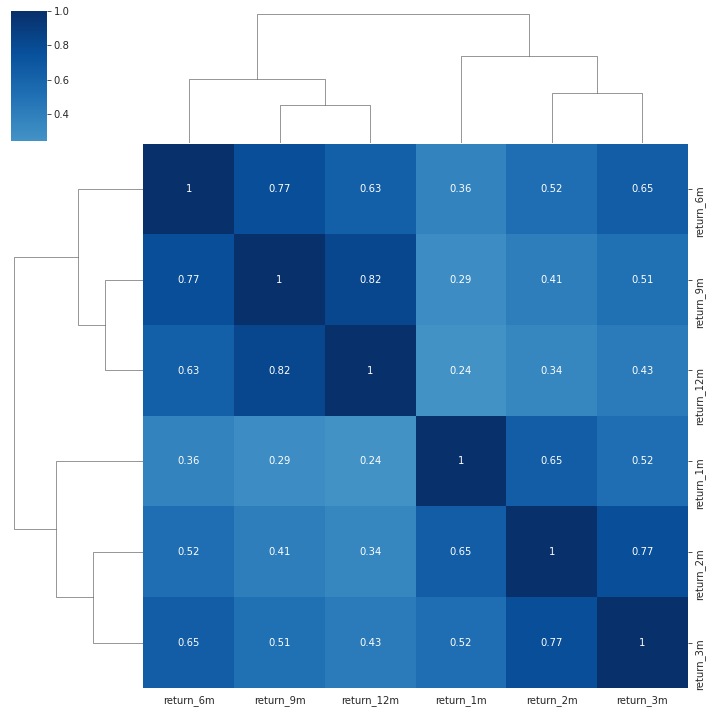

In [ ]:
# cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.clustermap(data.corr('spearman'), annot=True, center=0, cmap='Blues');

We are left with 1,670 tickers.

In [ ]:
data.index.get_level_values('ticker').nunique()

1838

## Rolling Factor Betas

We will introduce the Fama—French data to estimate the exposure of assets to common risk factors using linear regression in [Chapter 9, Time Series Models](../09_time_series_models).

The five Fama—French factors, namely market risk, size, value, operating profitability, and investment have been shown empirically to explain asset returns and are commonly used to assess the risk/return profile of portfolios. Hence, it is natural to include past factor exposures as financial features in models that aim to predict future returns.

We can access the historical factor returns using the `pandas-datareader` and estimate historical exposures using the `RollingOLS` rolling linear regression functionality in the `statsmodels` library as follows:

Use Fama-French research factors to estimate the factor exposures of the stock in the dataset to the 5 factors market risk, size, value, operating profitability and investment.

In [ ]:
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='2000')[0].drop('RF', axis=1)
factor_data.index = factor_data.index.to_timestamp()
factor_data = factor_data.resample('M').last().div(100)
factor_data.index.name = 'date'
factor_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2000-01-31 to 2021-02-28
Freq: M
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  254 non-null    float64
 1   SMB     254 non-null    float64
 2   HML     254 non-null    float64
 3   RMW     254 non-null    float64
 4   CMA     254 non-null    float64
dtypes: float64(5)
memory usage: 11.9 KB


In [ ]:
factor_data = factor_data.join(data['return_1m']).sort_index()
factor_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 360752 entries, ('A', Timestamp('2001-01-31 00:00:00', freq='M')) to ('ZUMZ', Timestamp('2018-03-31 00:00:00', freq='M'))
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Mkt-RF     360752 non-null  float64
 1   SMB        360752 non-null  float64
 2   HML        360752 non-null  float64
 3   RMW        360752 non-null  float64
 4   CMA        360752 non-null  float64
 5   return_1m  360752 non-null  float64
dtypes: float64(6)
memory usage: 18.0+ MB


In [ ]:
T = 24
betas = (factor_data.groupby(level='ticker',
                             group_keys=False)
         .apply(lambda x: RollingOLS(endog=x.return_1m,
                                     exog=sm.add_constant(x.drop('return_1m', axis=1)),
                                     window=min(T, x.shape[0]-1))
                .fit(params_only=True)
                .params
                .drop('const', axis=1)))

In [ ]:
betas.describe().join(betas.sum(1).describe().to_frame('total'))

Mkt-RF            SMB            HML            RMW  \
count  318478.000000  318478.000000  318478.000000  318478.000000   
mean        0.981855       0.628163       0.128131      -0.059253   
std         0.918800       1.248071       1.615972       1.919938   
min        -9.922641     -10.212033     -17.654894     -22.925165   
25%         0.465445      -0.114605      -0.710399      -0.979216   
50%         0.932070       0.542998       0.101903       0.039229   
75%         1.447381       1.303487       0.955263       0.955362   
max        10.916430      10.373043      14.558920      17.413382   

                 CMA          total  
count  318478.000000  360752.000000  
mean        0.013774       1.494318  
std         2.182730       3.291402  
min       -18.182706     -31.429456  
25%        -1.086919       0.000000  
50%         0.032834       1.214277  
75%         1.140431       3.145515  
max        17.626042      33.316296

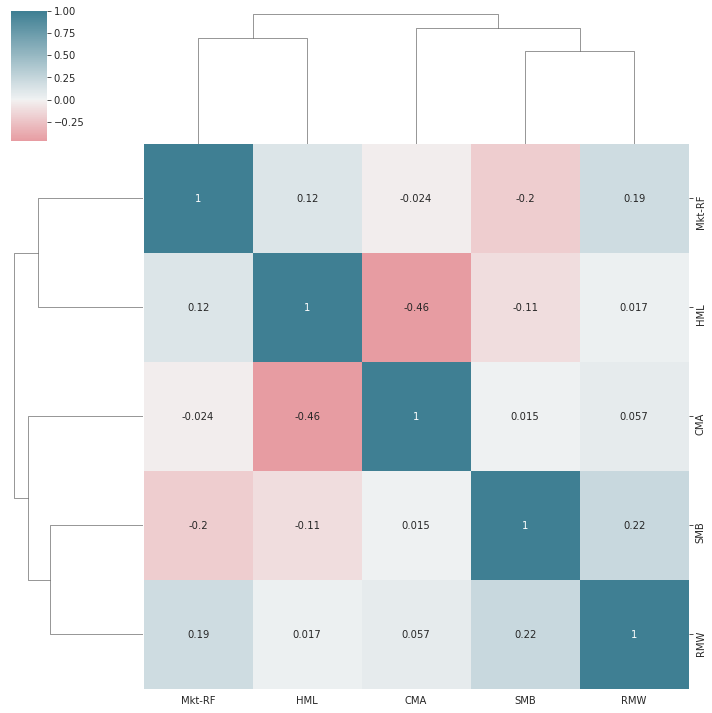

In [ ]:
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.clustermap(betas.corr(), annot=True, cmap=cmap, center=0);

In [ ]:
data = (data
        .join(betas
              .groupby(level='ticker')
              .shift()))
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 360752 entries, ('A', Timestamp('2001-01-31 00:00:00', freq='M')) to ('ZUMZ', Timestamp('2018-03-31 00:00:00', freq='M'))
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   return_1m   360752 non-null  float64
 1   return_2m   360752 non-null  float64
 2   return_3m   360752 non-null  float64
 3   return_6m   360752 non-null  float64
 4   return_9m   360752 non-null  float64
 5   return_12m  360752 non-null  float64
 6   Mkt-RF      316640 non-null  float64
 7   SMB         316640 non-null  float64
 8   HML         316640 non-null  float64
 9   RMW         316640 non-null  float64
 10  CMA         316640 non-null  float64
dtypes: float64(11)
memory usage: 39.8+ MB


### Impute mean for missing factor betas

In [ ]:
data.loc[:, factors] = data.groupby('ticker')[factors].apply(lambda x: x.fillna(x.mean()))
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 360752 entries, ('A', Timestamp('2001-01-31 00:00:00', freq='M')) to ('ZUMZ', Timestamp('2018-03-31 00:00:00', freq='M'))
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   return_1m   360752 non-null  float64
 1   return_2m   360752 non-null  float64
 2   return_3m   360752 non-null  float64
 3   return_6m   360752 non-null  float64
 4   return_9m   360752 non-null  float64
 5   return_12m  360752 non-null  float64
 6   Mkt-RF      360752 non-null  float64
 7   SMB         360752 non-null  float64
 8   HML         360752 non-null  float64
 9   RMW         360752 non-null  float64
 10  CMA         360752 non-null  float64
dtypes: float64(11)
memory usage: 39.8+ MB


## Momentum factors

We can use these results to compute momentum factors based on the difference between returns over longer periods and the most recent monthly return, as well as for the difference between 3 and 12 month returns as follows:

In [ ]:
for lag in [2,3,6,9,12]:
    data[f'momentum_{lag}'] = data[f'return_{lag}m'].sub(data.return_1m)
data[f'momentum_3_12'] = data[f'return_12m'].sub(data.return_3m)

## Date Indicators

In [ ]:
dates = data.index.get_level_values('date')
data['year'] = dates.year
data['month'] = dates.month

## Lagged returns

To use lagged values as input variables or features associated with the current observations, we use the .shift() method to move historical returns up to the current period:

In [ ]:
for t in range(1, 7):
    data[f'return_1m_t-{t}'] = data.groupby(level='ticker').return_1m.shift(t)
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 360752 entries, ('A', Timestamp('2001-01-31 00:00:00', freq='M')) to ('ZUMZ', Timestamp('2018-03-31 00:00:00', freq='M'))
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   return_1m      360752 non-null  float64
 1   return_2m      360752 non-null  float64
 2   return_3m      360752 non-null  float64
 3   return_6m      360752 non-null  float64
 4   return_9m      360752 non-null  float64
 5   return_12m     360752 non-null  float64
 6   Mkt-RF         360752 non-null  float64
 7   SMB            360752 non-null  float64
 8   HML            360752 non-null  float64
 9   RMW            360752 non-null  float64
 10  CMA            360752 non-null  float64
 11  momentum_2     360752 non-null  float64
 12  momentum_3     360752 non-null  float64
 13  momentum_6     360752 non-null  float64
 14  momentum_9     360752 non-null  float64
 15  momentum_12    360752 non

## Target: Holding Period Returns

Similarly, to compute returns for various holding periods, we use the normalized period returns computed previously and shift them back to align them with the current financial features

In [ ]:
for t in [1,2,3,6,12]:
    data[f'target_{t}m'] = data.groupby(level='ticker')[f'return_{t}m'].shift(-t)

In [ ]:
cols = ['target_1m',
        'target_2m',
        'target_3m', 
        'return_1m',
        'return_2m',
        'return_3m',
        'return_1m_t-1',
        'return_1m_t-2',
        'return_1m_t-3']

data[cols].dropna().sort_index().head(10)

target_1m  target_2m  target_3m  return_1m  return_2m  \
ticker date                                                                
A      2001-04-30  -0.140220  -0.087246  -0.098192   0.269444   0.040966   
       2001-05-31  -0.031008  -0.076414  -0.075527  -0.140220   0.044721   
       2001-06-30  -0.119692  -0.097014  -0.155847  -0.031008  -0.087246   
       2001-07-31  -0.073750  -0.173364  -0.080114  -0.119692  -0.076414   
       2001-08-31  -0.262264  -0.083279   0.009593  -0.073750  -0.097014   
       2001-09-30   0.139130   0.181052   0.134010  -0.262264  -0.173364   
       2001-10-31   0.224517   0.131458   0.108697   0.139130  -0.083279   
       2001-11-30   0.045471   0.054962   0.045340   0.224517   0.181052   
       2001-12-31   0.064539   0.045275   0.070347   0.045471   0.131458   
       2002-01-31   0.026359   0.073264  -0.003306   0.064539   0.054962   

                   return_3m  return_1m_t-1  return_1m_t-2  return_1m_t-3  
ticker date                                                                
A      2001-04-30  -0.105747      -0.146389      -0.329564      -0.003653  
       2001-05-31  -0.023317       0.269444      -0.146389      -0.329564  
       2001-06-30   0.018842      -0.140220       0.269444      -0.146389  
       2001-07-31  -0.098192      -0.031008      -0.140220       0.269444  
       2001-08-31  -0.075527      -0.119692      -0.031008      -0.140220  
       2001-09-30  -0.155847      -0.073750      -0.119692      -0.031008  
       2001-10-31  -0.080114      -0.262264      -0.073750      -0.119692  
       2001-11-30   0.009593       0.139130      -0.262264      -0.073750  
       2001-12-31   0.134010       0.224517       0.139130      -0.262264  
       2002-01-31   0.108697       0.045471       0.224517       0.139130

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 360752 entries, ('A', Timestamp('2001-01-31 00:00:00', freq='M')) to ('ZUMZ', Timestamp('2018-03-31 00:00:00', freq='M'))
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   return_1m      360752 non-null  float64
 1   return_2m      360752 non-null  float64
 2   return_3m      360752 non-null  float64
 3   return_6m      360752 non-null  float64
 4   return_9m      360752 non-null  float64
 5   return_12m     360752 non-null  float64
 6   Mkt-RF         360752 non-null  float64
 7   SMB            360752 non-null  float64
 8   HML            360752 non-null  float64
 9   RMW            360752 non-null  float64
 10  CMA            360752 non-null  float64
 11  momentum_2     360752 non-null  float64
 12  momentum_3     360752 non-null  float64
 13  momentum_6     360752 non-null  float64
 14  momentum_9     360752 non-null  float64
 15  momentum_12    360752 non

## Create age proxy

We use quintiles of IPO year as a proxy for company age.

In [ ]:
data = (data
        .join(pd.qcut(stocks.ipoyear, q=5, labels=list(range(1, 6)))
              .astype(float)
              .fillna(0)
              .astype(int)
              .to_frame('age')))
data.age = data.age.fillna(-1)

## Create dynamic size proxy

We use the marketcap information from the NASDAQ ticker info to create a size proxy.

In [ ]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2412 entries, A to ZUMZ
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   marketcap  2407 non-null   float64
 1   ipoyear    1065 non-null   float64
 2   sector     2372 non-null   object 
dtypes: float64(2), object(1)
memory usage: 139.9+ KB


Market cap information is tied to currrent prices. We create an adjustment factor to have the values reflect lower historical prices for each individual stock:

In [ ]:
size_factor = (monthly_prices
               .loc[data.index.get_level_values('date').unique(),
                    data.index.get_level_values('ticker').unique()]
               .sort_index(ascending=False)
               .pct_change()
               .fillna(0)
               .add(1)
               .cumprod())
size_factor.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207 entries, 2018-03-31 to 2001-01-31
Columns: 1838 entries, A to ZUMZ
dtypes: float64(1838)
memory usage: 2.9 MB


In [ ]:
msize = (size_factor
         .mul(stocks
              .loc[size_factor.columns, 'marketcap'])).dropna(axis=1, how='all')

### Create Size indicator as deciles per period

Compute size deciles per month:

In [ ]:
data['msize'] = (msize
                 .apply(lambda x: pd.qcut(x, q=10, labels=list(range(1, 11)))
                        .astype(int), axis=1)
                 .stack()
                 .swaplevel())
data.msize = data.msize.fillna(-1)

## Combine data

In [ ]:
data = data.join(stocks[['sector']])
data.sector = data.sector.fillna('Unknown')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 360752 entries, ('A', Timestamp('2001-01-31 00:00:00', freq='M')) to ('ZUMZ', Timestamp('2018-03-31 00:00:00', freq='M'))
Data columns (total 33 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   return_1m      360752 non-null  float64
 1   return_2m      360752 non-null  float64
 2   return_3m      360752 non-null  float64
 3   return_6m      360752 non-null  float64
 4   return_9m      360752 non-null  float64
 5   return_12m     360752 non-null  float64
 6   Mkt-RF         360752 non-null  float64
 7   SMB            360752 non-null  float64
 8   HML            360752 non-null  float64
 9   RMW            360752 non-null  float64
 10  CMA            360752 non-null  float64
 11  momentum_2     360752 non-null  float64
 12  momentum_3     360752 non-null  float64
 13  momentum_6     360752 non-null  float64
 14  momentum_9     360752 non-null  float64
 15  momentum_12    360752 non

## Store data

We will use the data again in several later chapters, starting in [Chapter 7 on Linear Models](../07_linear_models).

In [ ]:
with pd.HDFStore(DATA_STORE) as store:
    store.put('engineered_features', data.sort_index().loc[idx[:, :datetime(2018, 3, 1)], :])
    print(store.info())

<class 'pandas.io.pytables.HDFStore'>
File path: ../data/assets.h5
/engineered_features                        frame        (shape->[358914,33])                                                                
/quandl/wiki/prices                         frame        (shape->[15389314,12])                                                              
/quandl/wiki/stocks                         frame        (shape->[1,2])                                                                      
/sp500/fred                                 frame        (shape->[2609,1])                                                                   
/sp500/sp500_stooq                          frame        (shape->[17700,5])                                                                  
/sp500/stocks                               frame        (shape->[1,7])                                                                      
/sp500/stooq                                frame        (shape->[17700,5])      

## Create Dummy variables

For most models, we need to encode categorical variables as 'dummies' (one-hot encoding):

In [ ]:
dummy_data = pd.get_dummies(data,
                            columns=['year','month', 'msize', 'age',  'sector'],
                            prefix=['year','month', 'msize', 'age', ''],
                            prefix_sep=['_', '_', '_', '_', ''])
dummy_data = dummy_data.rename(columns={c:c.replace('.0', '') for c in dummy_data.columns})
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 360752 entries, ('A', Timestamp('2001-01-31 00:00:00', freq='M')) to ('ZUMZ', Timestamp('2018-03-31 00:00:00', freq='M'))
Data columns (total 88 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   return_1m              360752 non-null  float64
 1   return_2m              360752 non-null  float64
 2   return_3m              360752 non-null  float64
 3   return_6m              360752 non-null  float64
 4   return_9m              360752 non-null  float64
 5   return_12m             360752 non-null  float64
 6   Mkt-RF                 360752 non-null  float64
 7   SMB                    360752 non-null  float64
 8   HML                    360752 non-null  float64
 9   RMW                    360752 non-null  float64
 10  CMA                    360752 non-null  float64
 11  momentum_2             360752 non-null  float64
 12  momentum_3             360752 non-null  float64


### TA-Lib를 사용해 기술적 알파 팩터를 만드는 방법
- 200개가 넘는 잘 알려진 기술적 분석 지표들의 표준화된 구현을 포함
- 위 지표들은 시장 데이터, 즉 가격과 거래량 정보만을 사용함

- 볼린저 밴드(Bolinger Bands)는 SMA의 위와 아래로 롤링 2 표준 편차 밴드에 의해 둘러싸인 단순 이동 평균(SMA, Simple Moving Average)으로 구성
    - 가격이 각각 상단이나 하단의 두 밴드 바깥으로 벗어날 때 잠재적 과매수/과매도 조건의 시각화를 위해 도입됌
    

Set data store location:

In [ ]:
DATA_STORE = '../data/assets.h5'

We load the AAPL stock price for the 2007-10 using `pd.IndexSlice` to perform a slice operation on the `pd.MultiIndex`, select the adjusted close price and unpivot the column to convert the DataFrame to wide format with tickers in the columns and timestamps in the rows:

In [ ]:
with pd.HDFStore(DATA_STORE) as store:
    data = (store['quandl/wiki/prices']
            .loc[idx['2007':'2010', 'AAPL'],
                 ['adj_open', 'adj_high', 'adj_low', 'adj_close', 'adj_volume']]
            .unstack('ticker')
            .swaplevel(axis=1)
            .loc[:, 'AAPL']
            .rename(columns=lambda x: x.replace('adj_', '')))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2007-01-03 to 2010-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1008 non-null   float64
 1   high    1008 non-null   float64
 2   low     1008 non-null   float64
 3   close   1008 non-null   float64
 4   volume  1008 non-null   float64
dtypes: float64(5)
memory usage: 47.2 KB


## Compute Bollinger Bands

In [ ]:
up, mid, low = BBANDS(data.close, timeperiod=21, nbdevup=2, nbdevdn=2, matype=0)

## Compute Relative Strength Index

In [ ]:
rsi = RSI(data.close, timeperiod=14)

## Moving Average Convergence/Divergence

The MACD computes the difference between two Exponential Moving Averages (EMA), one longer- and one shorter-term.

The ta-lib MACD Indicator implementation has four inputs:
- the close price
- `fastperiod`: the short-term EMA period
- `slowperiod`: the long-term EMA period
- `signalperiod`: the period for the EMA of the MACD itself

It has three outputs:
- `macd` is the difference between the fast EMA and slow EMA.
- `macdsignal` is the EMA of the MACD value with period `signalperiod`
- `macdhist` computes the difference between `macd` and `macdsignal`

In [ ]:
macd, macdsignal, macdhist = MACD(data.close, fastperiod=12, slowperiod=26, signalperiod=9)

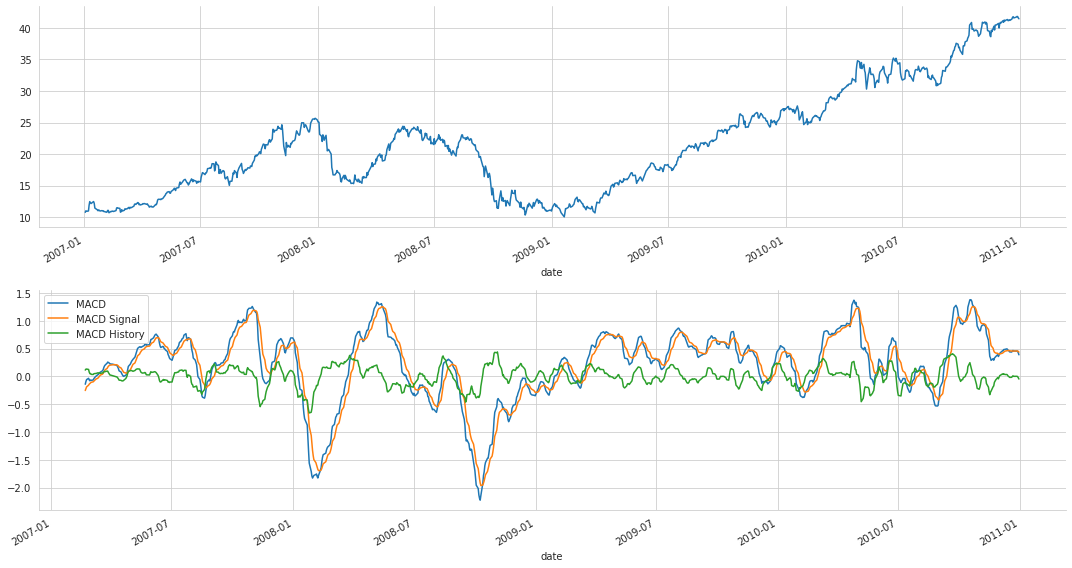

In [ ]:
macd_data = pd.DataFrame({'AAPL': data.close, 'MACD': macd, 'MACD Signal': macdsignal, 'MACD History': macdhist})

fig, axes= plt.subplots(nrows=2, figsize=(15, 8))
macd_data.AAPL.plot(ax=axes[0])
macd_data.drop('AAPL', axis=1).plot(ax=axes[1])
fig.tight_layout()
sns.despine();

## Plot Result

In [ ]:
data = pd.DataFrame({'AAPL': data.close, 'BB Up': up, 'BB Mid': mid, 'BB down': low, 'RSI': rsi, 'MACD': macd})

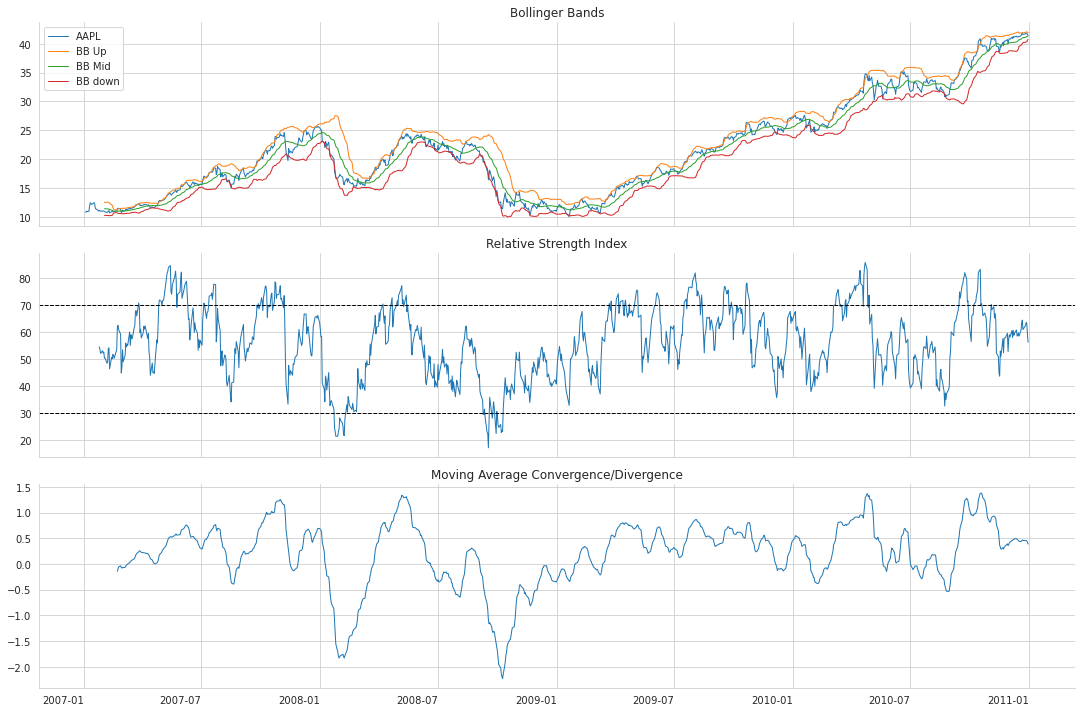

In [ ]:
fig, axes= plt.subplots(nrows=3, figsize=(15, 10), sharex=True)
data.drop(['RSI', 'MACD'], axis=1).plot(ax=axes[0], lw=1, title='Bollinger Bands')
data['RSI'].plot(ax=axes[1], lw=1, title='Relative Strength Index')
axes[1].axhline(70, lw=1, ls='--', c='k')
axes[1].axhline(30, lw=1, ls='--', c='k')
data.MACD.plot(ax=axes[2], lw=1, title='Moving Average Convergence/Divergence', rot=0)
axes[2].set_xlabel('')
fig.tight_layout()
sns.despine();

#### 칼만 필터를 사용한 알파 팩터의 잡음 제거
- 데이터의 잡음 개념은 신호 처리 영역과 관련 (신호 처리 영역은 전자파의 형태로 공기를 통해 전송되는 신호에서 정확한 정보를 추출하는 것을 목표로함)
- 칼만필터는 ㅈ시계열과 같은 순차적 데이터에 대한 동적 선형 모델로 새로운 정보가 도달하면 이에 대해 적응하는 모델임
    - 이동 평균과 같은 고정 크기 윈도우 또는 지수 이동 평균과 같은 주어진 가중치 세트를 사용하는 것이 아니라 확률 모델을 기반으로 새로운 데이터를 시계열의 현재 값 추정에 반영함
     1. 예측 스텝(prediction step) : 프로세스의 현재 상태를 추정
     2. 측정 스텝(measurement step) : 잡음이 섞인 관측을 사용해 양 스텝에서 정보를 더 확실한 추정치에 더 높은 가중치를 주는 식으로 평균해 추정치를 업데이트함
     


# How to use the Kalman Filter and Wavelets

## Imports & Settings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline

from datetime import datetime
import itertools

import pandas as pd
import pandas_datareader.data as web
from pykalman import KalmanFilter
import pywt

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
idx = pd.IndexSlice

## Get Data

The `assets.h5` store can be generated using the the notebook [create_datasets](../../data/create_datasets.ipynb) in the [data](../../data) directory in the root directory of this repo for instruction to download the following dataset.

We load the Quandl stock price datasets covering the US equity markets 2000-18 using `pd.IndexSlice` to perform a slice operation on the `pd.MultiIndex`, select the adjusted close price and unpivot the column to convert the DataFrame to wide format with tickers in the columns and timestamps in the rows:

Set data store location:

In [ ]:
DATA_STORE = '../data/assets.h5'

In [ ]:
with pd.HDFStore(DATA_STORE) as store:
    sp500 = store['sp500/stooq'].loc['2009': '2010', 'close']

## Kalman Filter 

### Configuration

In [ ]:
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)

### Estimate the hidden state

In [ ]:
state_means, _ = kf.filter(sp500)

### Compare with moving average

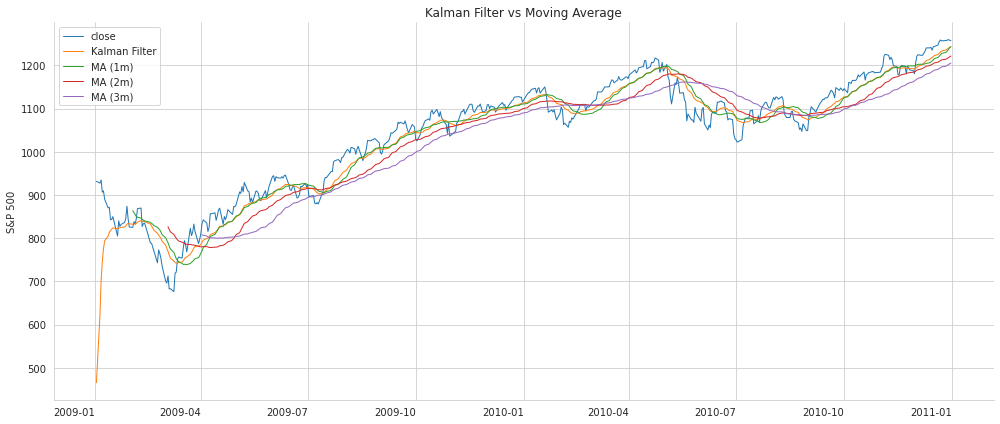

In [ ]:
sp500_smoothed = sp500.to_frame('close')
sp500_smoothed['Kalman Filter'] = state_means
for months in [1,2,3]:
    sp500_smoothed[f'MA ({months}m)'] = sp500.rolling(window=months*21).mean()

ax = sp500_smoothed.plot(title='Kalman Filter vs Moving Average', figsize=(14,6), lw=1, rot=0)
ax.set_xlabel('')
ax.set_ylabel('S&P 500')
plt.tight_layout()
sns.despine();

### 웨이블릿을 이용한 잡음 데이터의 전처리 방법
- 웨이블릿(wavelet)은 잡음이 섞인 신호를 근사하고자 여러 주파수에서의 사인과 코사인 파동을 결합하는 푸리에 분석(Fourier analysis)에 연관
- 푸리에 분석이 시간으로부터의 신호를 주파수 영역으로 변환하는 데 특히 유용한 반면 웨이블릿은 각각 하나의 주파수 범위에 상응하는 여러 스케일에서 발생할 수 있는 특정 패턴을 필터링하는 데 유용함 (파동과 유사한 패턴))

## Wavelets

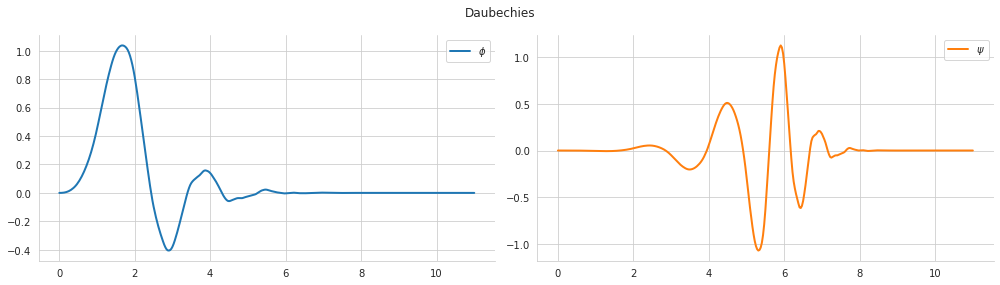

In [ ]:
wavelet = pywt.Wavelet('db6')
phi, psi, x = wavelet.wavefun(level=5)
df = pd.DataFrame({'$\phi$': phi, '$\psi$': psi}, index=x)
df.plot(title='Daubechies', subplots=True, layout=(1, 2), figsize=(14, 4), lw=2, rot=0)
plt.tight_layout()
sns.despine();

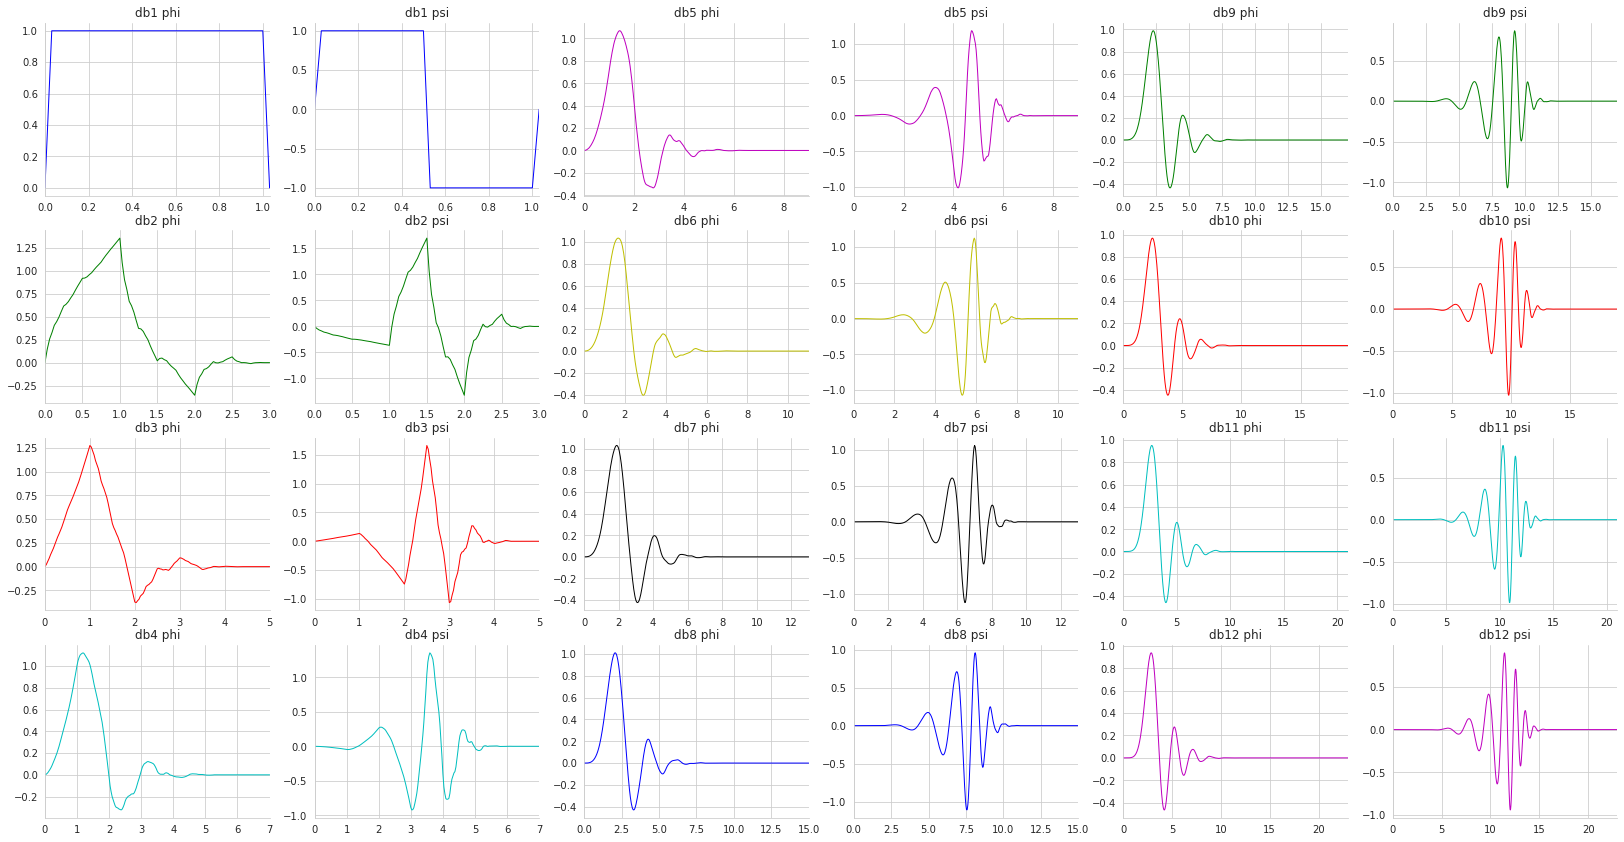

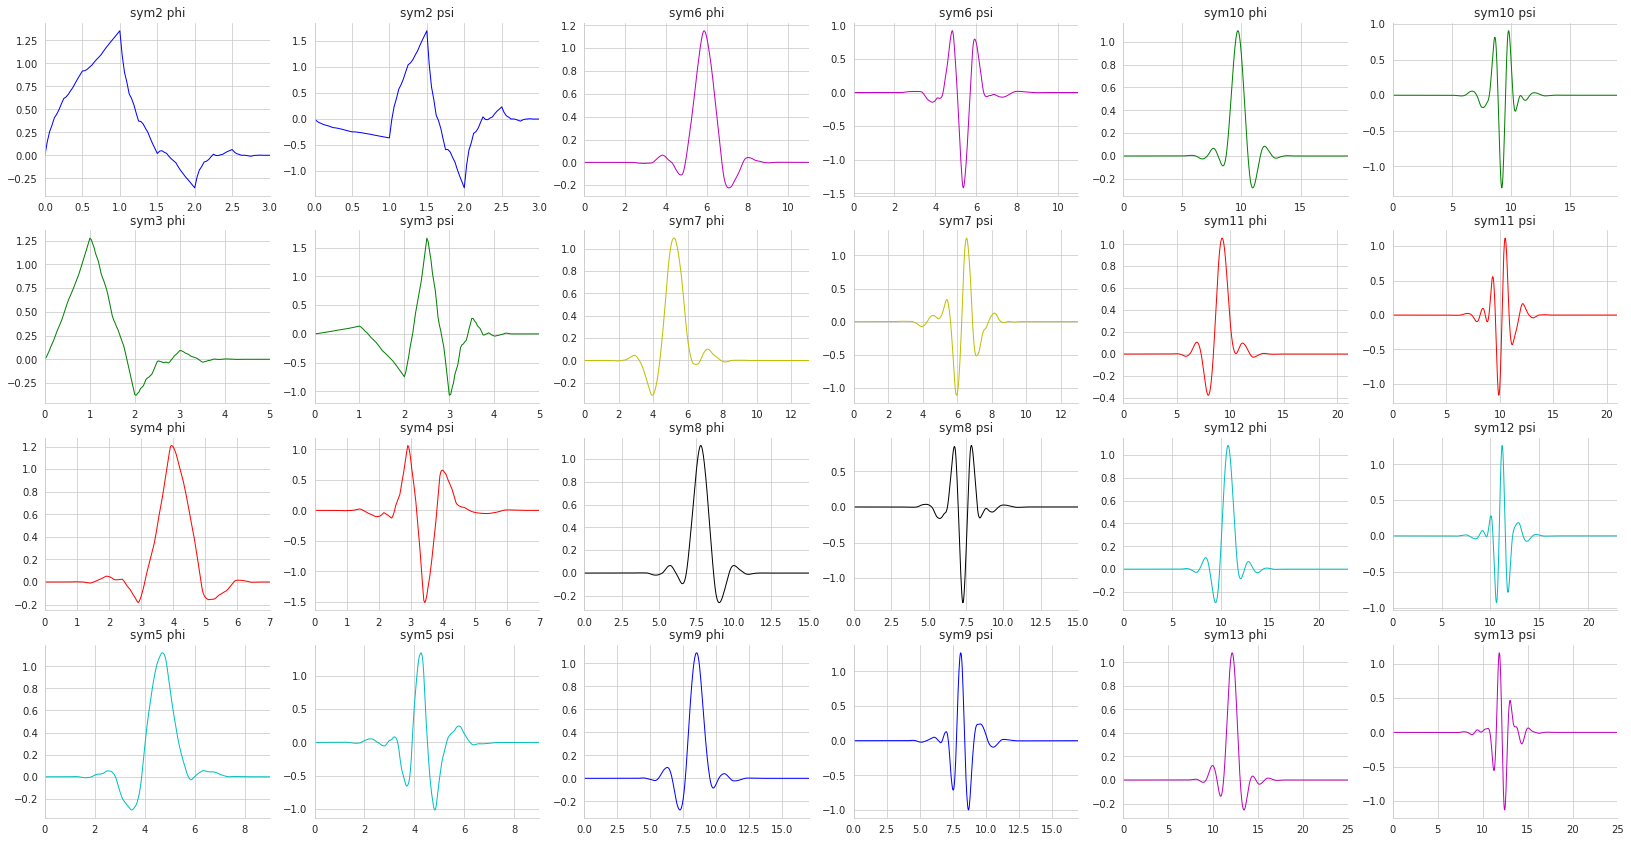

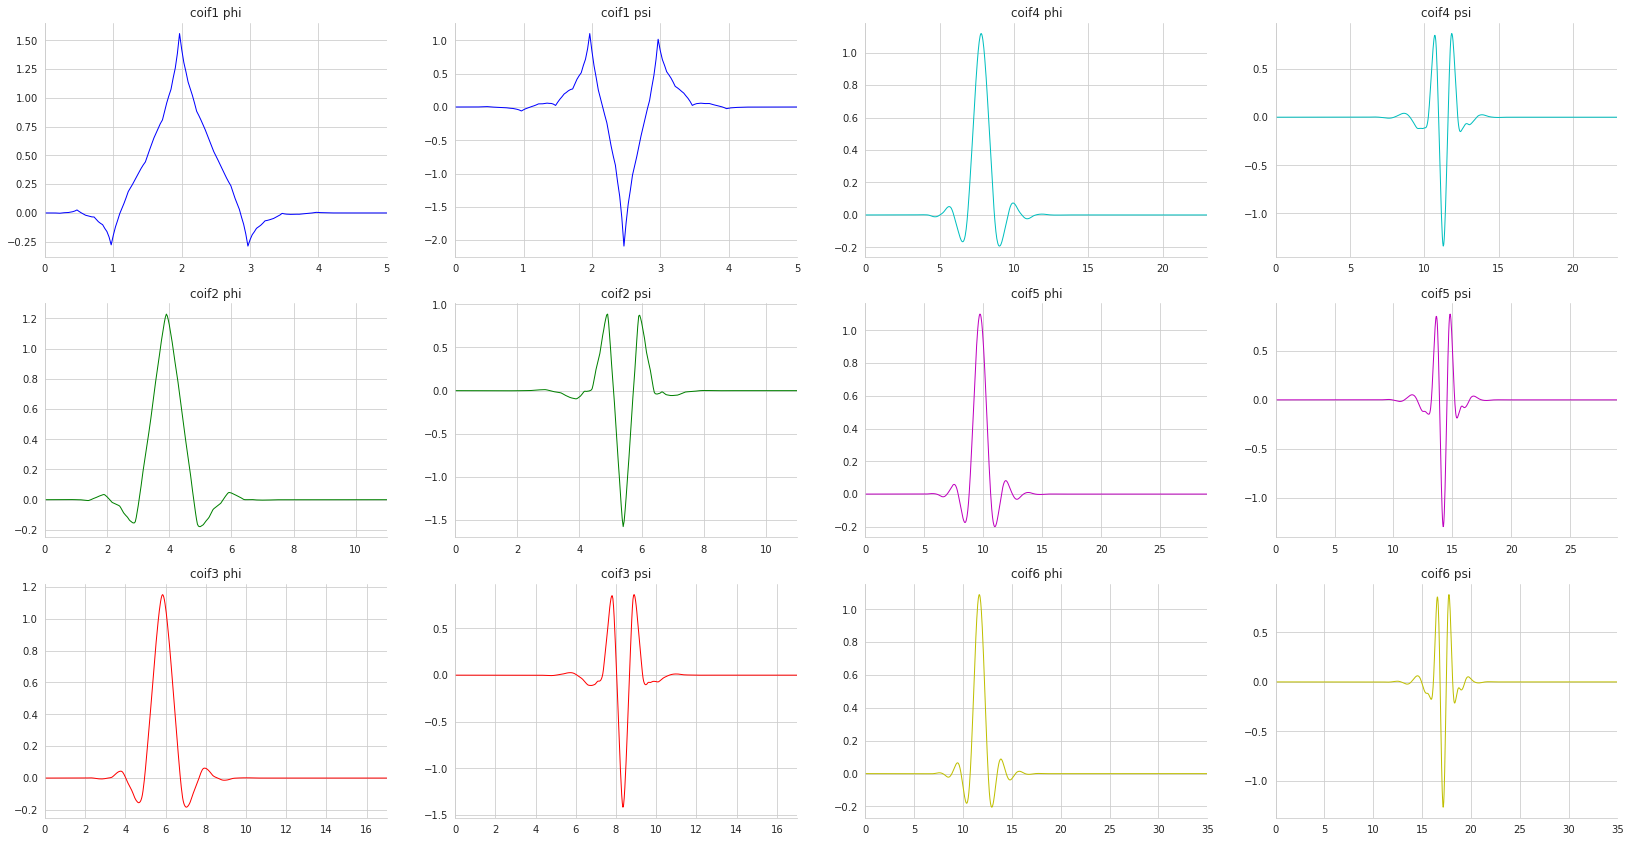

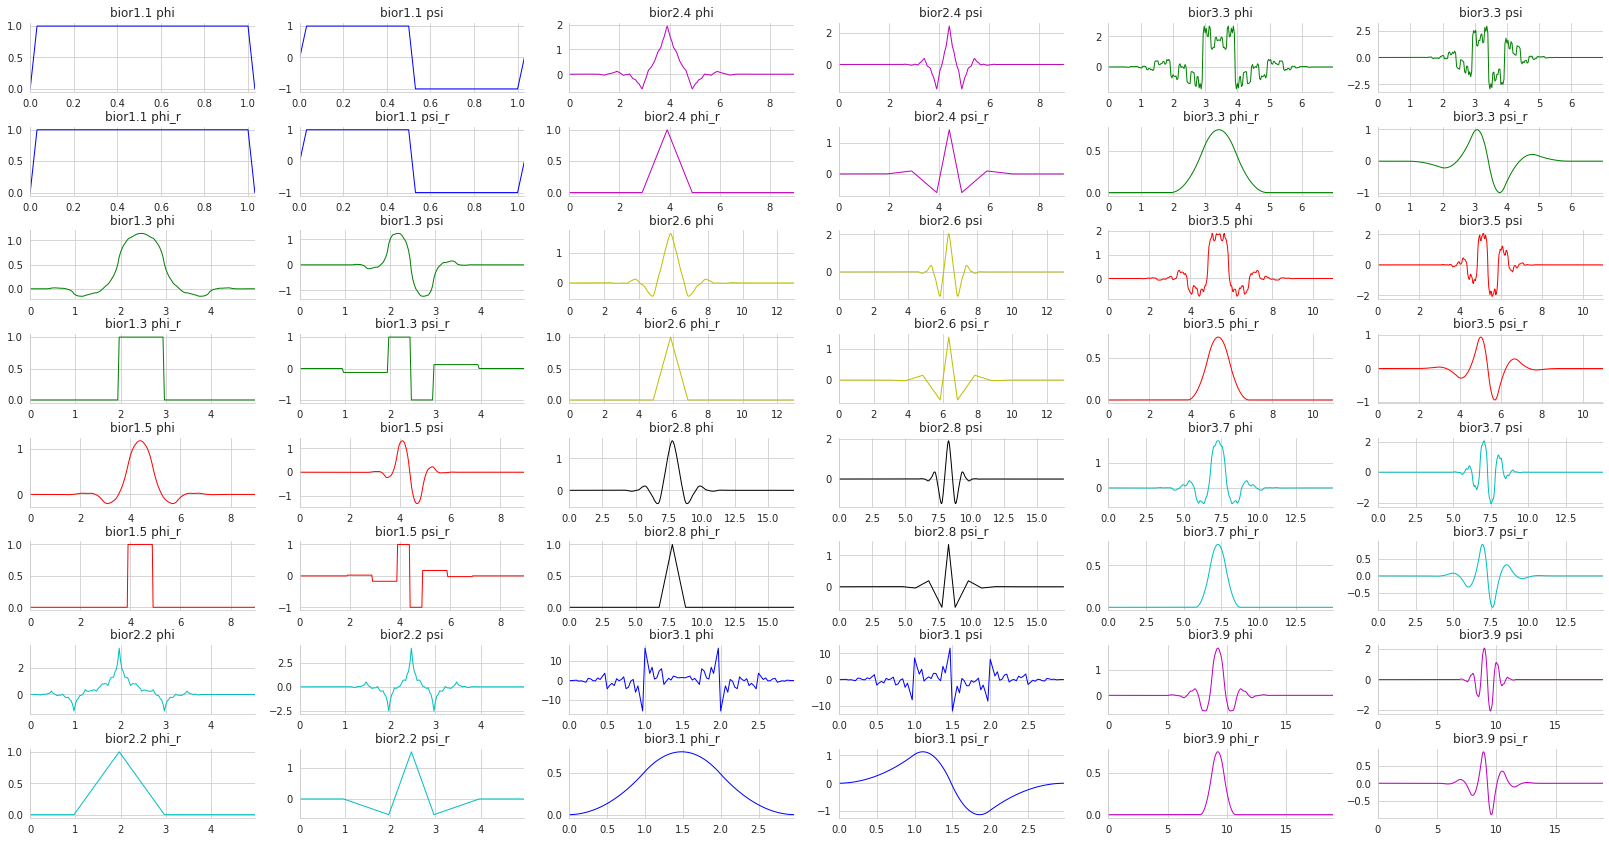

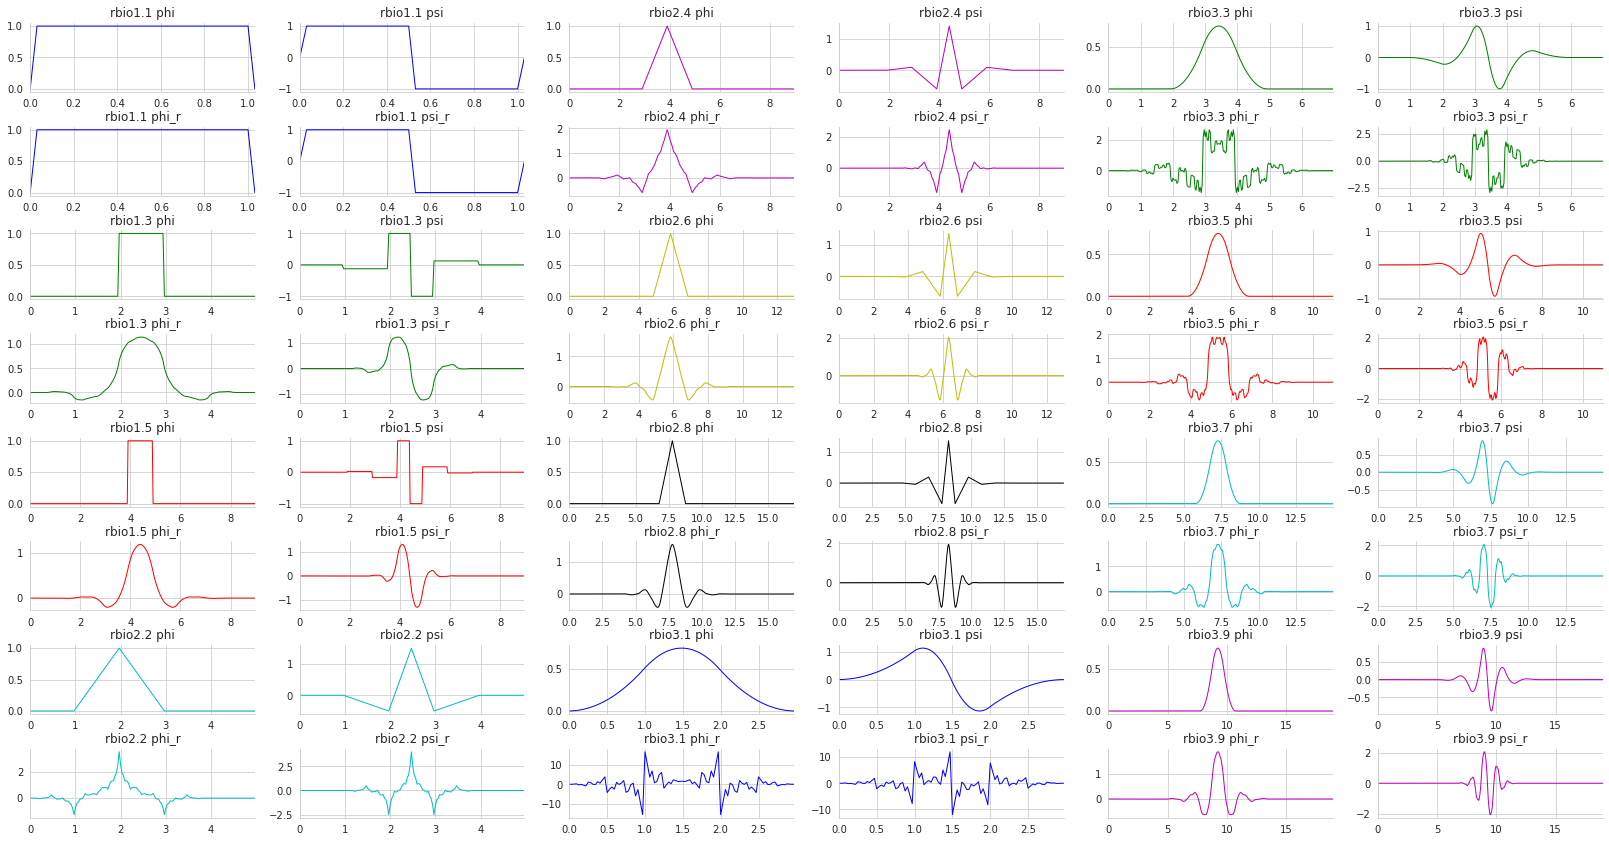

In [ ]:
plot_data = [('db', (4, 3)),
             ('sym', (4, 3)),
             ('coif', (3, 2))]


for family, (rows, cols) in plot_data:
    fig = plt.figure(figsize=(24, 12))
    fig.subplots_adjust(hspace=0.2, wspace=0.2, bottom=.02, left=.06,
                        right=.97, top=.94)
    colors = itertools.cycle('bgrcmyk')

    wnames = pywt.wavelist(family)
    i = iter(wnames)
    for col in range(cols):
        for row in range(rows):
            try:
                wavelet = pywt.Wavelet(next(i))
            except StopIteration:
                break
            phi, psi, x = wavelet.wavefun(level=5)

            color = next(colors)
            ax = fig.add_subplot(rows, 2 * cols, 1 + 2 * (col + row * cols))
            ax.set_title(wavelet.name + " phi")
            ax.plot(x, phi, color, lw=1)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(rows, 2*cols, 1 + 2*(col + row*cols) + 1)
            ax.set_title(wavelet.name + " psi")
            ax.plot(x, psi, color, lw=1)
            ax.set_xlim(min(x), max(x))
    sns.despine()

for family, (rows, cols) in [('bior', (4, 3)), ('rbio', (4, 3))]:
    fig = plt.figure(figsize=(24, 12))
    fig.subplots_adjust(hspace=0.5, wspace=0.2, bottom=.02, left=.06,
                        right=.97, top=.94)

    colors = itertools.cycle('bgrcmyk')
    wnames = pywt.wavelist(family)
    i = iter(wnames)
    for col in range(cols):
        for row in range(rows):
            try:
                wavelet = pywt.Wavelet(next(i))
            except StopIteration:
                break
            phi, psi, phi_r, psi_r, x = wavelet.wavefun(level=5)
            row *= 2

            color = next(colors)
            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols))
            ax.set_title(wavelet.name + " phi")
            ax.plot(x, phi, color, lw=1)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(2*rows, 2*cols, 2*(1 + col + row*cols))
            ax.set_title(wavelet.name + " psi")
            ax.plot(x, psi, color, lw=1)
            ax.set_xlim(min(x), max(x))

            row += 1
            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols))
            ax.set_title(wavelet.name + " phi_r")
            ax.plot(x, phi_r, color, lw=1)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols) + 1)
            ax.set_title(wavelet.name + " psi_r")
            ax.plot(x, psi_r, color, lw=1)
            ax.set_xlim(min(x), max(x))
    sns.despine()

plt.show()

### Available Wavelet Families

In [ ]:
pywt.families(short=False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

### Smoothing the S&P 500

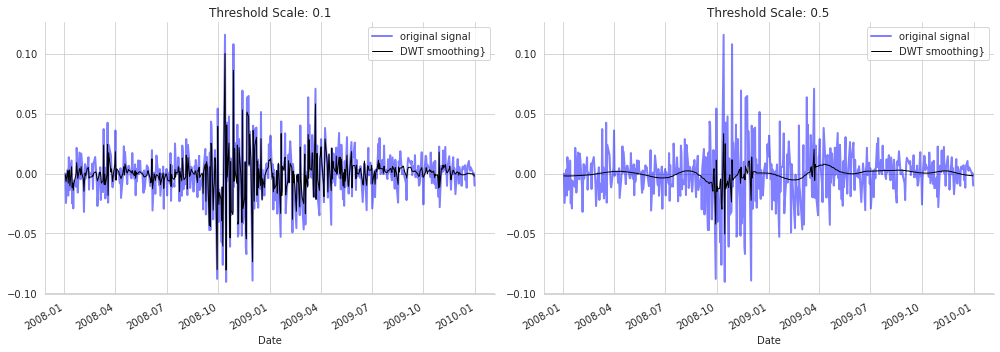

In [ ]:
signal = (pd.read_hdf(DATA_STORE, 'sp500/stooq')
          .loc['2008': '2009']
          .close.pct_change()
          .dropna())

fig, axes = plt.subplots(ncols=2, figsize=(14, 5))

wavelet = "db6"
for i, scale in enumerate([.1, .5]):
    
    coefficients = pywt.wavedec(signal, wavelet, mode='per')
    coefficients[1:] = [pywt.threshold(i, value=scale*signal.max(), mode='soft') for i in coefficients[1:]]
    reconstructed_signal = pywt.waverec(coefficients, wavelet, mode='per')
    signal.plot(color="b", alpha=0.5, label='original signal', lw=2, 
                 title=f'Threshold Scale: {scale:.1f}', ax=axes[i])
    pd.Series(reconstructed_signal, index=signal.index).plot(c='k', label='DWT smoothing}', linewidth=1, ax=axes[i])
    axes[i].legend()
fig.tight_layout()
sns.despine();

## 신호에서 트레이딩으로: 백테스트를 위한 집라인
- 오픈소스인 집라인(Zipline) 라이브러리는 이벤트 기반의 벡테스트 시스템임
- 시장 이벤트를 발생시켜 알고리즘 트레이딩 전략의 반응을 시뮬레이션하고 성과를 추적함
- 중요한 속성으로 집라인은 알고리즘에 선견 편향을 회피하는 과거 시점별 데이터를 제공


### 단일 팩터 전략을 팩테스트하는 방법
- 알파 팩터를 연구하고 평가하고자 데이터 번들(Data Bundle)로 집라인을 오프라인에서 사용할 수 있음

# Zipline Backtest with Single Factor 

This notebook develops and test a simple mean-reversion factor that measures how much recent performance has deviated from the historical average. Short-term reversal is a common strategy that takes advantage of the weakly predictive pattern that stock price increases are likely to mean-revert back down over horizons from less than a minute to one month.

## Imports & Settings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style('whitegrid')

We are first going to illustrate the zipline alpha factor research workflow in an offline environment. In particular, we will develop and test a simple mean-reversion factor that measures how much recent performance has deviated from the historical average. 

Short-term reversal is a common strategy that takes advantage of the weakly predictive pattern that stock price increases are likely to mean-revert back down over horizons from less than a minute to one month.

To this end, the factor computes the z-score for the last monthly return relative to the rolling monthly returns over the last year. At this point, we will not place any orders to simply illustrate the implementation of a CustomFactor and record the results during the simulation.

After some basic settings, `MeanReversion` subclasses `CustomFactor` and defines a `compute()` method. It creates default inputs of monthly returns over an also default year-long window so that the monthly_return variable will have 252 rows and one column for each security in the Quandl dataset on a given day.

The `compute_factors()` method creates a `MeanReversion` factor instance and creates long, short, and ranking pipeline columns. The former two contain Boolean values that could be used to place orders, and the latter reflects that overall ranking to evaluate the overall factor performance. Furthermore, it uses the built-in `AverageDollarVolume` factor to limit the computation to more liquid stocks

The result would allow us to place long and short orders. We will see in the next chapter how to build a portfolio by choosing a rebalancing period and adjusting portfolio holdings as new signals arrive.

- The `initialize()` method registers the compute_factors() pipeline, and the before_trading_start() method ensures the pipeline runs on a daily basis. 
- The `record()` function adds the pipeline's ranking column as well as the current asset prices to the performance DataFrame returned by the `run_algorithm()` function

Run using jupyter notebook extension

In [ ]:
%load_ext zipline

Using the `quandl` bundle instead of the default `quantopian-quandl` because the latter has a bug that requires (manually) fixing the SQL database. If you have a file with benchmark returns you can provide this instead of `--no-benchmark` (see [docs](https://github.com/stefan-jansen/zipline/blob/master/docs/source/whatsnew/1.4.0.txt)).

In [ ]:
%%zipline --start 2015-1-1 --end 2018-1-1 --output single_factor.pickle --no-benchmark --bundle quandl

from zipline.api import (
    attach_pipeline,
    date_rules,
    time_rules,
    order_target_percent,
    pipeline_output,
    record,
    schedule_function,
    get_open_orders,
    calendars
)
from zipline.finance import commission, slippage
from zipline.pipeline import Pipeline, CustomFactor
from zipline.pipeline.factors import Returns, AverageDollarVolume
import numpy as np
import pandas as pd

MONTH = 21
YEAR = 12 * MONTH
N_LONGS = N_SHORTS = 25
VOL_SCREEN = 1000


class MeanReversion(CustomFactor):
    """Compute ratio of latest monthly return to 12m average,
       normalized by std dev of monthly returns"""
    inputs = [Returns(window_length=MONTH)]
    window_length = YEAR

    def compute(self, today, assets, out, monthly_returns):
        df = pd.DataFrame(monthly_returns)
        out[:] = df.iloc[-1].sub(df.mean()).div(df.std())


def compute_factors():
    """Create factor pipeline incl. mean reversion,
        filtered by 30d Dollar Volume; capture factor ranks"""
    mean_reversion = MeanReversion()
    dollar_volume = AverageDollarVolume(window_length=30)
    return Pipeline(columns={'longs': mean_reversion.bottom(N_LONGS),
                             'shorts': mean_reversion.top(N_SHORTS),
                             'ranking': mean_reversion.rank(ascending=False)},
                    screen=dollar_volume.top(VOL_SCREEN))


def exec_trades(data, assets, target_percent):
    """Place orders for assets using target portfolio percentage"""
    for asset in assets:
        if data.can_trade(asset) and not get_open_orders(asset):
            order_target_percent(asset, target_percent)


def rebalance(context, data):
    """Compute long, short and obsolete holdings; place trade orders"""
    factor_data = context.factor_data
    record(factor_data=factor_data.ranking)

    assets = factor_data.index
    record(prices=data.current(assets, 'price'))

    longs = assets[factor_data.longs]
    shorts = assets[factor_data.shorts]
    divest = set(context.portfolio.positions.keys()) - set(longs.union(shorts))

    exec_trades(data, assets=divest, target_percent=0)
    exec_trades(data, assets=longs, target_percent=1 / N_LONGS)
    exec_trades(data, assets=shorts, target_percent=-1 / N_SHORTS)


def initialize(context):
    """Setup: register pipeline, schedule rebalancing,
        and set trading params"""
    attach_pipeline(compute_factors(), 'factor_pipeline')
    schedule_function(rebalance,
                      date_rules.week_start(),
                      time_rules.market_open(),
                      calendar=calendars.US_EQUITIES)
    context.set_commission(commission.PerShare(cost=.01, min_trade_cost=0))
    context.set_slippage(slippage.VolumeShareSlippage())


def before_trading_start(context, data):
    """Run factor pipeline"""
    context.factor_data = pipeline_output('factor_pipeline')

period_open              period_close  shorts_count   long_value  short_value  long_exposure           pnl  capital_used  short_exposure                                             orders  ...     sortino max_drawdown  max_leverage  excess_return  treasury_period_return  trading_days  period_label  algorithm_period_return                                        factor_data                                             prices
2015-01-02 21:00:00+00:00 2015-01-02 14:31:00+00:00 2015-01-02 21:00:00+00:00             0        0.000        0.000          0.000      0.000000  0.000000e+00           0.000                                                 []  ...         NaN     0.000000      0.000000            0.0                     0.0             1       2015-01                 0.000000                                                NaN                                                NaN
2015-01-05 21:00:00+00:00 2015-01-05 14:31:00+00:00 2015-01-05 21:00:00+00:00             0        0.000        0.000          0.000      0.000000  0.000000e+00           0.000  [{'id': '4ef8337dc8614f9183a8e8a7a0df3c18', 'd...  ...         NaN     0.000000      0.000000            0.0                     0.0             2       2015-01                 0.000000  Equity(0 [A])          2707.0
Equity(2 [AAL]) ...  Equity(0 [A])           39.800
Equity(2 [AAL])...
2015-01-06 21:00:00+00:00 2015-01-06 14:31:00+00:00 2015-01-06 21:00:00+00:00             4  4731525.565 -1617262.705    4731525.565  -3799.475085 -3.118062e+06    -1617262.705  [{'id': '4ef8337dc8614f9183a8e8a7a0df3c18', 'd...  ...   -9.165151    -0.000380      0.635120            0.0                     0.0             3       2015-01                -0.000380  Equity(0 [A])          2707.0
Equity(2 [AAL]) ...  Equity(0 [A])           39.800
Equity(2 [AAL])...
2015-01-07 21:00:00+00:00 2015-01-07 14:31:00+00:00 2015-01-07 21:00:00+00:00             4  4757100.850 -1629987.410    4757100.850  12850.580000  0.000000e+00    -1629987.410                                                 []  ...   18.918320    -0.000380      0.638131            0.0                     0.0             4       2015-01                 0.000905  Equity(0 [A])          2707.0
Equity(2 [AAL]) ...  Equity(0 [A])           39.800
Equity(2 [AAL])...
2015-01-08 21:00:00+00:00 2015-01-08 14:31:00+00:00 2015-01-08 21:00:00+00:00             4  4835941.280 -1645106.080    4835941.280  63721.760000  0.000000e+00    -1645106.080                                                 []  ...  135.877107    -0.000380      0.643422            0.0                     0.0             5       2015-01                 0.007277  Equity(0 [A])          2707.0
Equity(2 [AAL]) ...  Equity(0 [A])           39.800
Equity(2 [AAL])...
...                                             ...                       ...           ...          ...          ...            ...           ...           ...             ...                                                ...  ...         ...          ...           ...            ...                     ...           ...           ...                      ...                                                ...                                                ...
2017-12-22 21:00:00+00:00 2017-12-22 14:31:00+00:00 2017-12-22 21:00:00+00:00            10  5266915.040 -4598653.320    5266915.040 -16960.030000  0.000000e+00    -4598653.320                                                 []  ...    0.609931    -0.142578      1.259576            0.0                     0.0           751       2017-12                 0.102076  Equity(0 [A])          2393.0
Equity(1 [AA])  ...  Equity(0 [A])          67.66
Equity(1 [AA])   ...
2017-12-26 21:00:00+00:00 2017-12-26 14:31:00+00:00 2017-12-26 21:00:00+00:00            10  5217746.950 -4592983.200    5217746.950 -43497.970000  0.000000e+00    -4592983.200  [{'id': 'fb0fdf179c8641beaeec4f1bff3d1ca4', 'd...  ...    0.587086    -0.142578      1.259576            0.0                     0.0  

## Inspect Results

We can get the result `DataFrame` using `_` which captures the last cell output (only works when you run it right after the above cell)

In [ ]:
result = _

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2015-01-02 21:00:00+00:00 to 2017-12-29 21:00:00+00:00
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   period_open              755 non-null    datetime64[ns, UTC]
 1   period_close             755 non-null    datetime64[ns, UTC]
 2   shorts_count             755 non-null    int64              
 3   long_value               755 non-null    float64            
 4   short_value              755 non-null    float64            
 5   long_exposure            755 non-null    float64            
 6   pnl                      755 non-null    float64            
 7   capital_used             755 non-null    float64            
 8   short_exposure           755 non-null    float64            
 9   orders                   755 non-null    object             
 10  transactions             755 non-null    object  

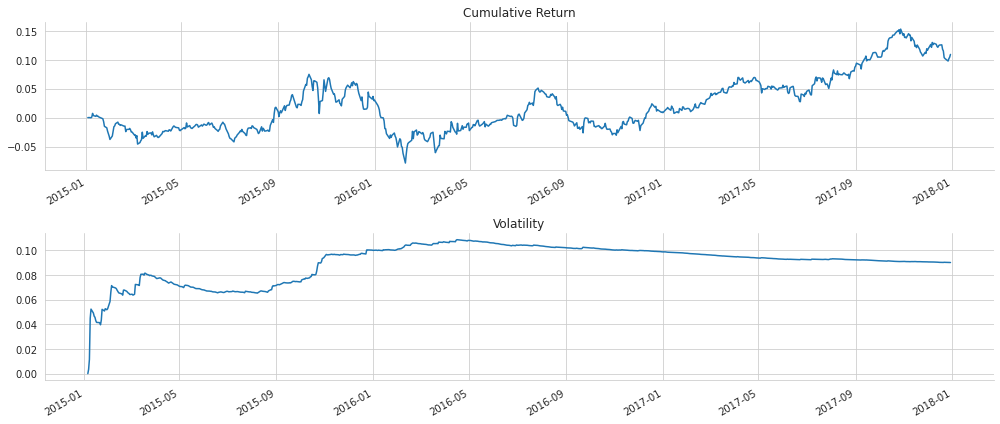

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(14,6))
result.algorithm_period_return.plot(ax=axes[0], title='Cumulative Return')
result.algo_volatility.plot(ax=axes[1], title='Volatility')
sns.despine()
fig.tight_layout();

# Separating signal and noise – how to use alphalens

Quantopian has open sourced the Python library, alphalens, for the performance analysis of predictive stock factors that integrates well with the backtesting library zipline and the portfolio performance and risk analysis library pyfolio that we will explore in the next chapter.
alphalens facilitates the analysis of the predictive power of alpha factors concerning the:
- Correlation of the signals with subsequent returns
- Profitability of an equal or factor-weighted portfolio based on a (subset of) the signals
- Turnover of factors to indicate the potential trading costs
- Factor-performance during specific events
- Breakdowns of the preceding by sector

The analysis can be conducted using tearsheets or individual computations and plots.

> This notebook requires the `conda` environment `backtest`. Please see the [installation instructions](../installation/README.md) for running the latest Docker image or alternative ways to set up your environment.

## Imports & Settings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline
import re
from alphalens.utils import get_clean_factor_and_forward_returns
from alphalens.performance import *
from alphalens.plotting import *
from alphalens.tears import *

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set_style('whitegrid')

## Creating forward returns and factor quantiles

To utilize `alpahalens`, we need to provide signals for a universe of assets like those returned by the ranks of the MeanReversion factor, and the forward returns earned by investing in an asset for a given holding period. .

> This notebook uses the file `single_factor.pickle` with the results generated in the notebook `single_factor_zipline.ipynb` in this directory.

We will recover the prices from the `single_factor.pickle` file as follows (`factor_data` accordingly):

In [ ]:
performance = pd.read_pickle('single_factor.pickle')

In [ ]:
performance.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2015-01-02 21:00:00+00:00 to 2017-12-29 21:00:00+00:00
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   period_open              755 non-null    datetime64[ns, UTC]
 1   period_close             755 non-null    datetime64[ns, UTC]
 2   shorts_count             755 non-null    int64              
 3   long_value               755 non-null    float64            
 4   short_value              755 non-null    float64            
 5   long_exposure            755 non-null    float64            
 6   pnl                      755 non-null    float64            
 7   capital_used             755 non-null    float64            
 8   short_exposure           755 non-null    float64            
 9   orders                   755 non-null    object             
 10  transactions             755 non-null    object  

In [ ]:
prices = pd.concat([df.to_frame(d) for d, df in performance.prices.dropna().items()],axis=1).T
prices.columns = [re.findall(r"\[(.+)\]", str(col))[0] for col in prices.columns]
prices.index = prices.index.normalize()
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2015-01-05 00:00:00+00:00 to 2017-12-29 00:00:00+00:00
Columns: 1649 entries, A to NETE
dtypes: float64(1649)
memory usage: 9.5 MB


In [ ]:
factor_data = pd.concat([df.to_frame(d) for d, df in performance.factor_data.dropna().items()],axis=1).T
factor_data.columns = [re.findall(r"\[(.+)\]", str(col))[0] for col in factor_data.columns]
factor_data.index = factor_data.index.normalize()
factor_data = factor_data.stack()
factor_data.index.names = ['date', 'asset']
factor_data.head()

date                       asset
2015-01-05 00:00:00+00:00  A        2707.0
                           AAL       870.0
                           AAP      1253.0
                           AAPL     2977.0
                           ABBV     2806.0
dtype: float64

In [ ]:
with pd.HDFStore('../data/assets.h5') as store:
    sp500 = store['sp500/stooq'].close
sp500 = sp500.resample('D').ffill().tz_localize('utc').filter(prices.index.get_level_values(0))
sp500.head()

Date
2015-01-05 00:00:00+00:00    2020.58
2015-01-06 00:00:00+00:00    2002.61
2015-01-07 00:00:00+00:00    2025.90
2015-01-08 00:00:00+00:00    2062.14
2015-01-09 00:00:00+00:00    2044.81
Name: close, dtype: float64

We can create the alphalens input data in the required format using the `get_clean_factor_and_forward_returns` utility function that also returns the signal quartiles and the forward returns for the given holding periods:

In [ ]:
HOLDING_PERIODS = (5, 10, 21, 42)
QUANTILES = 5
alphalens_data = get_clean_factor_and_forward_returns(factor=factor_data,
                                                      prices=prices,
                                                      periods=HOLDING_PERIODS,
                                                      quantiles=QUANTILES)

Dropped 5.6% entries from factor data: 5.6% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


The `alphalens_data` `DataFrame` contains the returns on an investment in the given asset on a given date for the indicated holding period, as well as the factor value, that is, the asset's `MeanReversion` ranking on that date, and the corresponding quantile value:

In [ ]:
alphalens_data.head()

5D       10D       21D       42D  \
date                      asset                                           
2015-01-05 00:00:00+00:00 A      0.007789 -0.046985 -0.027889  0.072864   
                          AAL   -0.079722 -0.020882 -0.095684 -0.103295   
                          AAP    0.015722 -0.024350 -0.003196 -0.010865   
                          AAPL   0.028235  0.023247  0.116518  0.214965   
                          ABBV   0.017169 -0.018561 -0.061098 -0.064811   

                                 factor  factor_quantile  
date                      asset                           
2015-01-05 00:00:00+00:00 A      2707.0                5  
                          AAL     870.0                1  
                          AAP    1253.0                2  
                          AAPL   2977.0                5  
                          ABBV   2806.0                5

In [ ]:
alphalens_data.reset_index().head().to_csv('factor_data.csv', index=False)

The forward returns and the signal quantiles are the basis for evaluating the predictive power of the signal. Typically, a factor should deliver markedly different returns for distinct quantiles, such as negative returns for the bottom quintile of the factor values and positive returns for the top quantile.

## Summary Tear Sheet

Quantiles Statistics


min     max         mean         std   count    count %
factor_quantile                                                            
1                   1.0  1011.0   303.057978  188.562449  142313  20.020145
2                 352.0  1636.0   856.678631  234.705707  142117  19.992572
3                 794.0  2153.0  1417.174265  259.942787  142019  19.978786
4                1273.0  2621.0  1979.178578  253.504821  142117  19.992572
5                1827.0  3050.0  2519.578804  227.348609  142283  20.015925

Returns Analysis


5D     10D    21D    42D
Ann. alpha                                      0.046   0.036  0.009  0.001
beta                                            0.083   0.098  0.077  0.019
Mean Period Wise Return Top Quantile (bps)     11.724   9.110  3.948 -0.376
Mean Period Wise Return Bottom Quantile (bps) -16.862 -13.259 -4.742 -1.979
Mean Period Wise Spread (bps)                  28.587  22.343  8.711  1.582

Information Analysis


5D    10D    21D    42D
IC Mean           0.022  0.026  0.017  0.003
IC Std.           0.140  0.127  0.116  0.115
Risk-Adjusted IC  0.160  0.207  0.148  0.027
t-stat(IC)        4.261  5.529  3.953  0.729
p-value(IC)       0.000  0.000  0.000  0.466
IC Skew           0.372  0.266  0.115  0.113
IC Kurtosis       0.054 -0.515 -0.333 -0.557

Turnover Analysis


5D    10D    21D    42D
Quantile 1 Mean Turnover   0.411  0.590  0.830  0.831
Quantile 2 Mean Turnover   0.645  0.740  0.804  0.812
Quantile 3 Mean Turnover   0.679  0.765  0.808  0.812
Quantile 4 Mean Turnover   0.642  0.741  0.810  0.814
Quantile 5 Mean Turnover   0.394  0.569  0.811  0.819

5D    10D    21D    42D
Mean Factor Rank Autocorrelation  0.713  0.454 -0.013 -0.017

<Figure size 432x288 with 0 Axes>

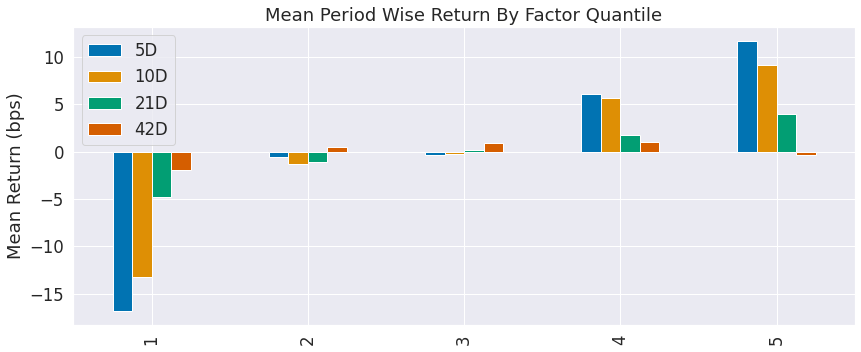

In [ ]:
create_summary_tear_sheet(alphalens_data)

## Predictive performance by factor quantiles -  Returns Analysis

As a first step, we would like to visualize the average period return by factor quantile. We can use the built-in function mean_return_by_quantile from the performance and plot_quantile_returns_bar from the plotting modules

In [ ]:
mean_return_by_q, std_err = mean_return_by_quantile(alphalens_data)
mean_return_by_q_norm = mean_return_by_q.apply(lambda x: x.add(1).pow(1/int(x.name[:-1])).sub(1))

### Mean Return by Holding Period and Quintile

The result is a bar chart that breaks down the mean of the forward returns for the four different holding periods based on the quintile of the factor signal. As you can see, the bottom quintiles yielded markedly more negative results than the top quintiles, except for the longest holding period:


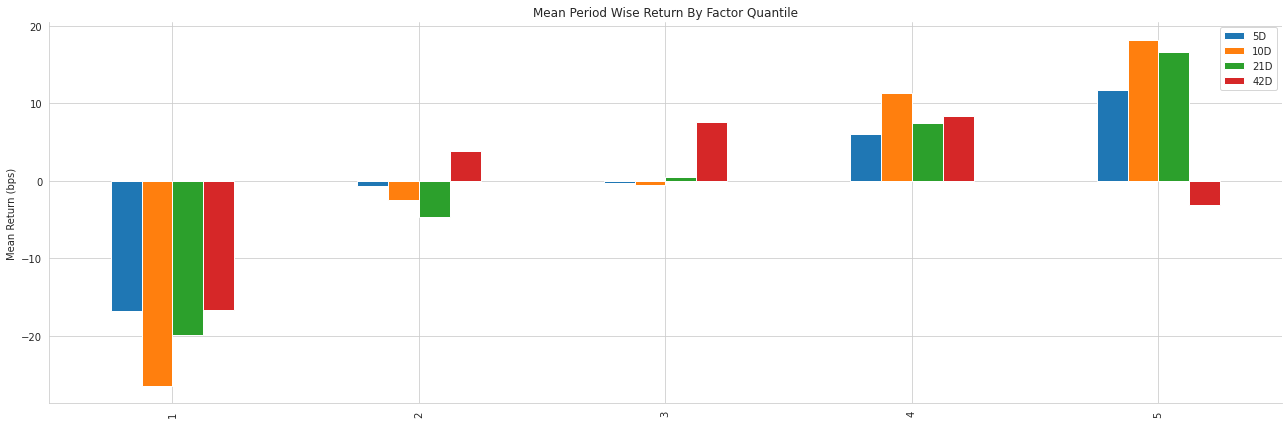

In [ ]:
plot_quantile_returns_bar(mean_return_by_q)
plt.tight_layout()
sns.despine();

The 10D holding period provides slightly better results for the first and fourth quartiles. We would also like to see the performance over time of investments driven by each of the signal quintiles. 

We will calculate daily, as opposed to average returns for the 5D holding period, and alphalens will adjust the period returns to account for the mismatch between daily signals and a longer holding period (for details, see docs):

In [ ]:
mean_return_by_q_daily, std_err = mean_return_by_quantile(alphalens_data, by_date=True)

### Cumulative 5D Return

The resulting line plot shows that, for most of this three-year period, the top two quintiles significantly outperformed the bottom two quintiles. However, as suggested by the previous plot, signals by the fourth quintile produced a better performance than those by the top quintile

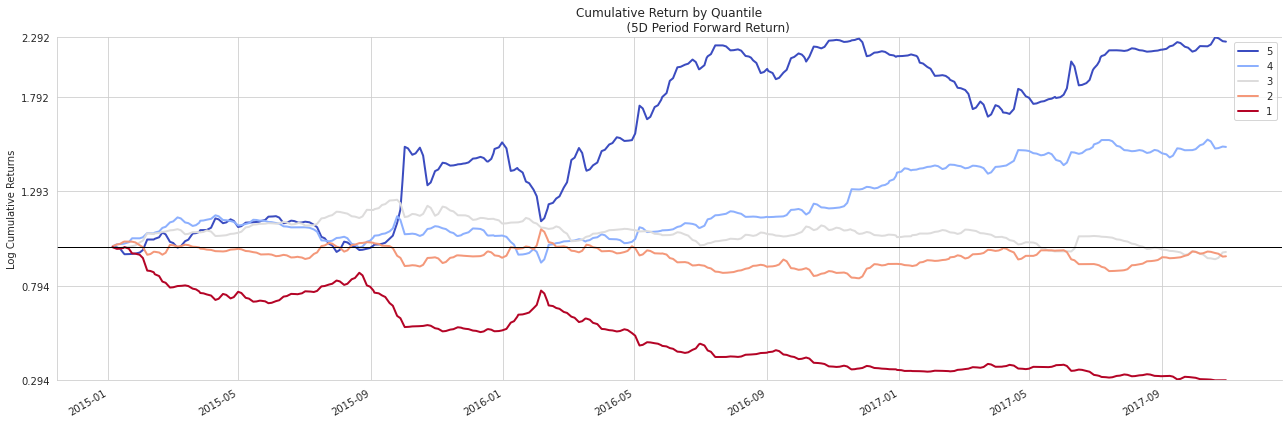

In [ ]:
plot_cumulative_returns_by_quantile(mean_return_by_q_daily['5D'], period='5D', freq=None)
plt.tight_layout()
sns.despine();

### Return Distribution by Holding Period and Quintile

This distributional plot highlights that the range of daily returns is fairly wide and, despite different means, the separation of the distributions is very limited so that, on any given day, the differences in performance between the different quintiles may be rather limited:

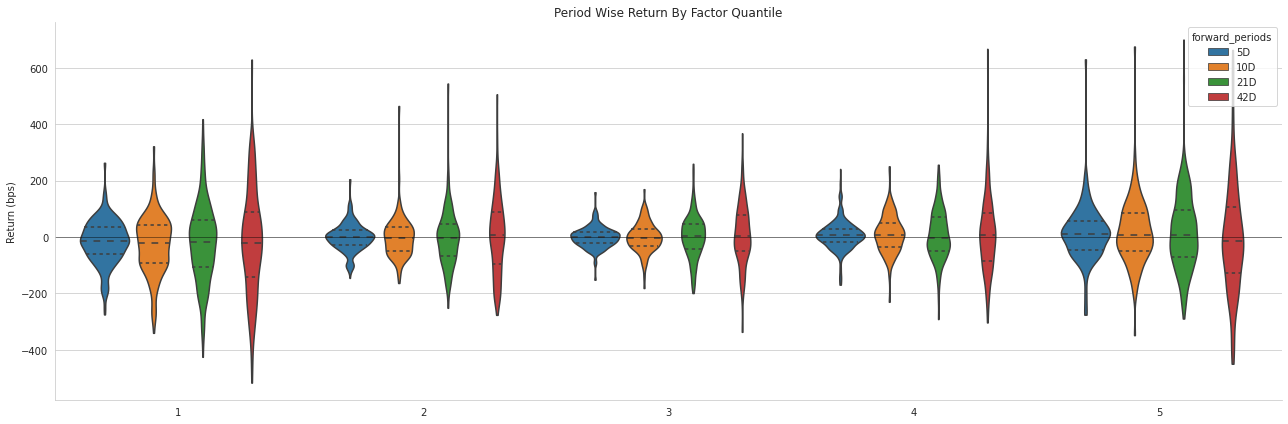

In [ ]:
plot_quantile_returns_violin(mean_return_by_q_daily)
plt.tight_layout()
sns.despine();

## Information Coefficient

Most of this book is about the design of alpha factors using ML models. ML is about optimizing some predictive objective, and in this section, we will introduce the key metrics used to measure the performance of an alpha factor. We will define alpha as the average return in excess of a benchmark.
This leads to the information ratio (IR) that measures the average excess return per unit of risk taken by dividing alpha by the tracking risk. When the benchmark is the risk-free rate, the IR corresponds to the well-known Sharpe ratio, and we will highlight crucial statistical measurement issues that arise in the typical case when returns are not normally distributed. We will also explain the fundamental law of active management that breaks the IR down into a combination of forecasting skill and a strategy's ability to effectively leverage the forecasting skills.

### 5D Information Coefficient (Rolling Average)

The goal of alpha factors is the accurate directional prediction of future returns. Hence, a natural performance measure is the correlation between an alpha factor's predictions and the forward returns of the target assets. 

It is better to use the non-parametric Spearman rank correlation coefficient that measures how well the relationship between two variables can be described using a monotonic function, as opposed to the Pearson correlation that measures the strength of a linear relationship. 

We can obtain the information coefficient using alphalens, which relies on `scipy.stats.spearmanr` under the hood. 

The `factor_information_coefficient` function computes the period-wise correlation and plot_ic_ts creates a time-series plot with one-month moving average:

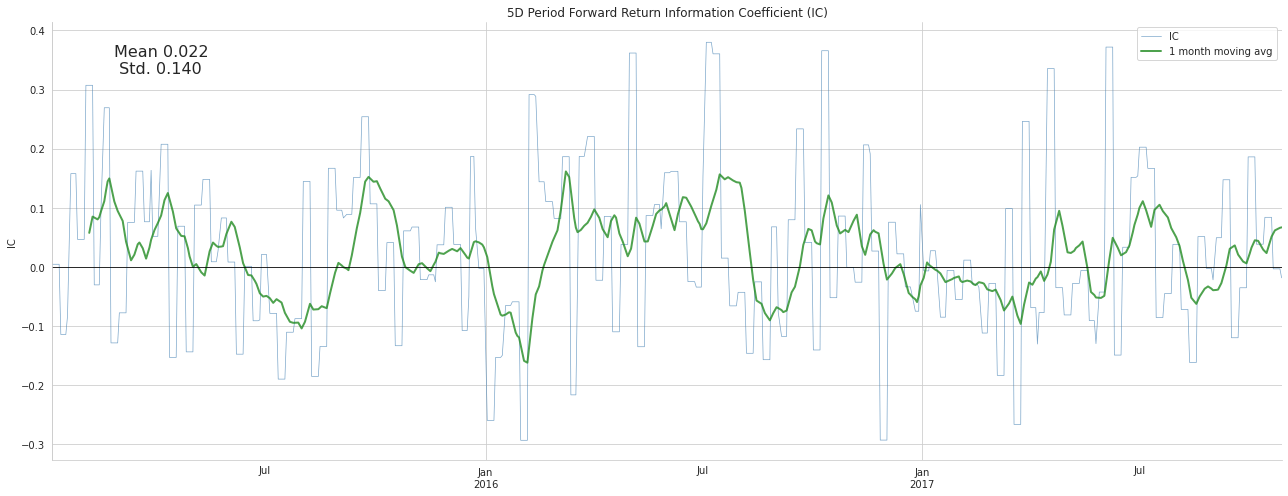

In [ ]:
ic = factor_information_coefficient(alphalens_data)
plot_ic_ts(ic[['5D']])
plt.tight_layout()
sns.despine();

### Information Coefficient by Holding Period

This time series plot shows extended periods with significantly positive moving-average IC. An IC of 0.05 or even 0.1 allows for significant outperformance if there are sufficient opportunities to apply this forecasting skill, as the fundamental law of active management will illustrate:

A plot of the annual mean IC highlights how the factor's performance was historically uneven:

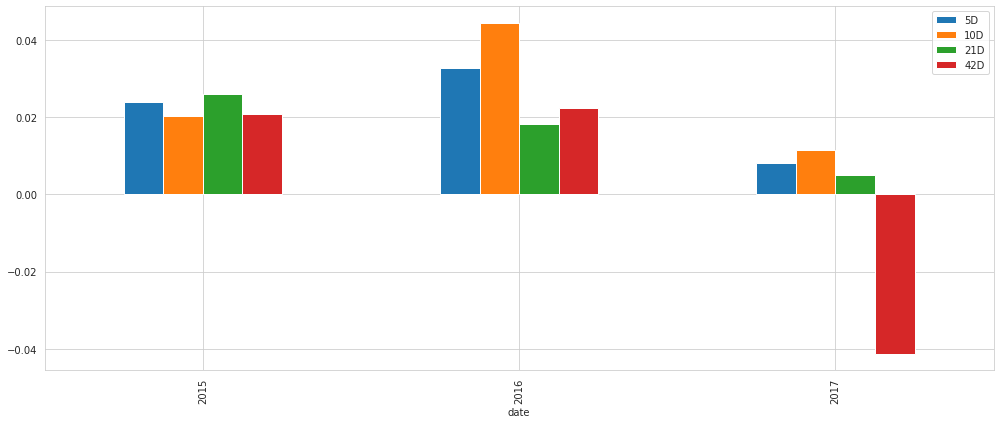

In [ ]:
ic = factor_information_coefficient(alphalens_data)
ic_by_year = ic.resample('A').mean()
ic_by_year.index = ic_by_year.index.year
ic_by_year.plot.bar(figsize=(14, 6))
plt.tight_layout();

## Turnover Tear Sheet

Factor turnover measures how frequently the assets associated with a given quantile change, that is, how many trades are required to adjust a portfolio to the sequence of signals. More specifically, it measures the share of assets currently in a factor quantile that was not in that quantile in the last period.

Turnover Analysis


5D    10D    21D    42D
Quantile 1 Mean Turnover   0.411  0.590  0.830  0.831
Quantile 2 Mean Turnover   0.645  0.740  0.804  0.812
Quantile 3 Mean Turnover   0.679  0.765  0.808  0.812
Quantile 4 Mean Turnover   0.642  0.741  0.810  0.814
Quantile 5 Mean Turnover   0.394  0.569  0.811  0.819

5D    10D    21D    42D
Mean Factor Rank Autocorrelation  0.713  0.454 -0.013 -0.017

<Figure size 432x288 with 0 Axes>

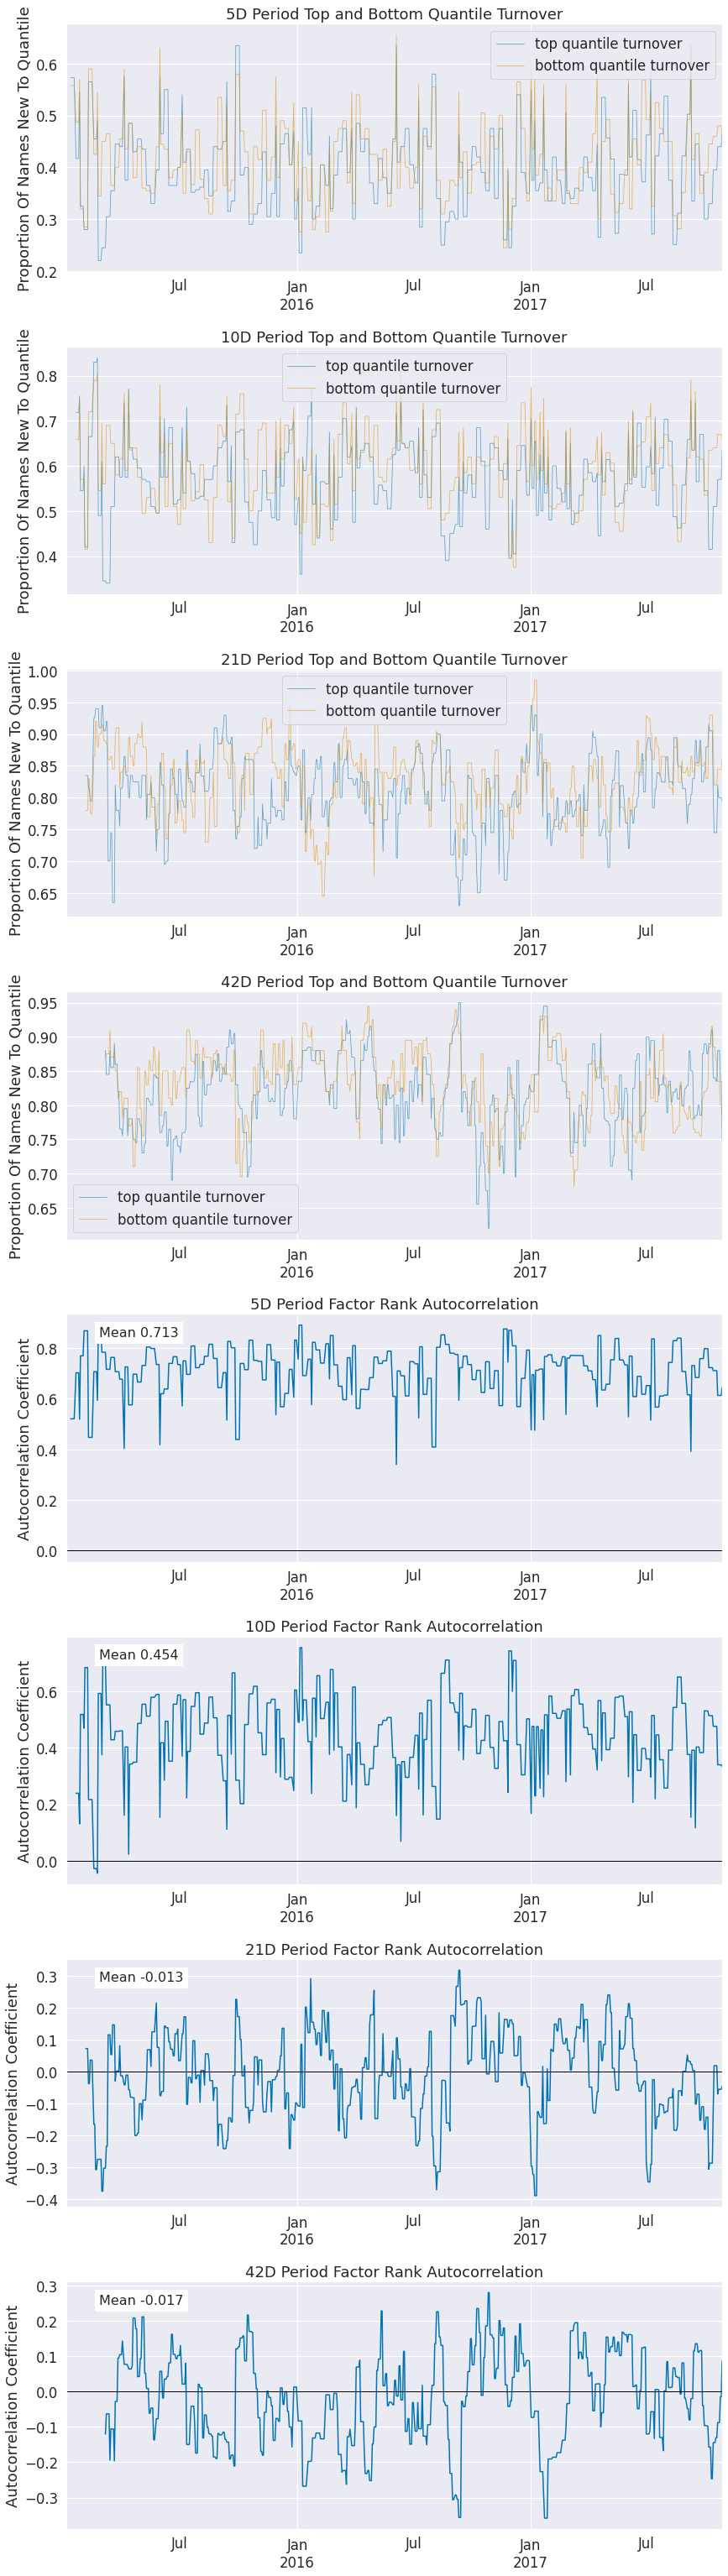

In [ ]:
create_turnover_tear_sheet(alphalens_data);

### 알파렌즈를 사용한 신호와 잡음의 분리
- 퀀토피안은 백테스트 라이브러리인 집라인과 잘 통합된 주식 팩터의 예측 성과 분석을 위한 알파렌즈라는 오픈소스 파이썬 라이프러리와 포트폴리오 성과 및 리스크 분석 라이브러리인 pyfolo를 갖고 있음
- 알파렌즈는 알파 팩터의 예측력에 대한 다음과 같은 분석을 용이하게함
    * 신호와 후속 기간의 수익률과 상관계수
    * 신호(의 부분집합)에 기반을 둔 균등 비중이나 팩터 가중의 포트폴리오의 수익성
    * 잠재 거래 비용을 나타내는 팩터의 회전율
    * 특정 이벤트 동안의 팩터 성과
    * 위의 사항들에 대한 섹터별 내역

#### 미래 수익률과 팩터 분위수의 생성
- 두 입력을 제공해야함
    - MeanReversion 팩터의 순우와 같은 유니버스에 대한 신호
    - 주어진 보유 기간 동안의 자산에 투자해서 얻은 미래 수익률



# Separating signal and noise – how to use alphalens

Quantopian has open sourced the Python library, alphalens, for the performance analysis of predictive stock factors that integrates well with the backtesting library zipline and the portfolio performance and risk analysis library pyfolio that we will explore in the next chapter.
alphalens facilitates the analysis of the predictive power of alpha factors concerning the:
- Correlation of the signals with subsequent returns
- Profitability of an equal or factor-weighted portfolio based on a (subset of) the signals
- Turnover of factors to indicate the potential trading costs
- Factor-performance during specific events
- Breakdowns of the preceding by sector

The analysis can be conducted using tearsheets or individual computations and plots.

> This notebook requires the `conda` environment `backtest`. Please see the [installation instructions](../installation/README.md) for running the latest Docker image or alternative ways to set up your environment.

## Imports & Settings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline
import re
from alphalens.utils import get_clean_factor_and_forward_returns
from alphalens.performance import *
from alphalens.plotting import *
from alphalens.tears import *

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set_style('whitegrid')

## Creating forward returns and factor quantiles

To utilize `alpahalens`, we need to provide signals for a universe of assets like those returned by the ranks of the MeanReversion factor, and the forward returns earned by investing in an asset for a given holding period. .

> This notebook uses the file `single_factor.pickle` with the results generated in the notebook `single_factor_zipline.ipynb` in this directory.

We will recover the prices from the `single_factor.pickle` file as follows (`factor_data` accordingly):

In [ ]:
performance = pd.read_pickle('single_factor.pickle')

In [ ]:
performance.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2015-01-02 21:00:00+00:00 to 2017-12-29 21:00:00+00:00
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   period_open              755 non-null    datetime64[ns, UTC]
 1   period_close             755 non-null    datetime64[ns, UTC]
 2   shorts_count             755 non-null    int64              
 3   long_value               755 non-null    float64            
 4   short_value              755 non-null    float64            
 5   long_exposure            755 non-null    float64            
 6   pnl                      755 non-null    float64            
 7   capital_used             755 non-null    float64            
 8   short_exposure           755 non-null    float64            
 9   orders                   755 non-null    object             
 10  transactions             755 non-null    object  

In [ ]:
prices = pd.concat([df.to_frame(d) for d, df in performance.prices.dropna().items()],axis=1).T
prices.columns = [re.findall(r"\[(.+)\]", str(col))[0] for col in prices.columns]
prices.index = prices.index.normalize()
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2015-01-05 00:00:00+00:00 to 2017-12-29 00:00:00+00:00
Columns: 1649 entries, A to NETE
dtypes: float64(1649)
memory usage: 9.5 MB


In [ ]:
factor_data = pd.concat([df.to_frame(d) for d, df in performance.factor_data.dropna().items()],axis=1).T
factor_data.columns = [re.findall(r"\[(.+)\]", str(col))[0] for col in factor_data.columns]
factor_data.index = factor_data.index.normalize()
factor_data = factor_data.stack()
factor_data.index.names = ['date', 'asset']
factor_data.head()

date                       asset
2015-01-05 00:00:00+00:00  A        2707.0
                           AAL       870.0
                           AAP      1253.0
                           AAPL     2977.0
                           ABBV     2806.0
dtype: float64

In [ ]:
with pd.HDFStore('../data/assets.h5') as store:
    sp500 = store['sp500/stooq'].close
sp500 = sp500.resample('D').ffill().tz_localize('utc').filter(prices.index.get_level_values(0))
sp500.head()

Date
2015-01-05 00:00:00+00:00    2020.58
2015-01-06 00:00:00+00:00    2002.61
2015-01-07 00:00:00+00:00    2025.90
2015-01-08 00:00:00+00:00    2062.14
2015-01-09 00:00:00+00:00    2044.81
Name: close, dtype: float64

We can create the alphalens input data in the required format using the `get_clean_factor_and_forward_returns` utility function that also returns the signal quartiles and the forward returns for the given holding periods:

In [ ]:
HOLDING_PERIODS = (5, 10, 21, 42)
QUANTILES = 5
alphalens_data = get_clean_factor_and_forward_returns(factor=factor_data,
                                                      prices=prices,
                                                      periods=HOLDING_PERIODS,
                                                      quantiles=QUANTILES)

Dropped 5.6% entries from factor data: 5.6% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


The `alphalens_data` `DataFrame` contains the returns on an investment in the given asset on a given date for the indicated holding period, as well as the factor value, that is, the asset's `MeanReversion` ranking on that date, and the corresponding quantile value:

In [ ]:
alphalens_data.head()

5D       10D       21D       42D  \
date                      asset                                           
2015-01-05 00:00:00+00:00 A      0.007789 -0.046985 -0.027889  0.072864   
                          AAL   -0.079722 -0.020882 -0.095684 -0.103295   
                          AAP    0.015722 -0.024350 -0.003196 -0.010865   
                          AAPL   0.028235  0.023247  0.116518  0.214965   
                          ABBV   0.017169 -0.018561 -0.061098 -0.064811   

                                 factor  factor_quantile  
date                      asset                           
2015-01-05 00:00:00+00:00 A      2707.0                5  
                          AAL     870.0                1  
                          AAP    1253.0                2  
                          AAPL   2977.0                5  
                          ABBV   2806.0                5

In [ ]:
alphalens_data.reset_index().head().to_csv('factor_data.csv', index=False)

The forward returns and the signal quantiles are the basis for evaluating the predictive power of the signal. Typically, a factor should deliver markedly different returns for distinct quantiles, such as negative returns for the bottom quintile of the factor values and positive returns for the top quantile.

## Summary Tear Sheet

Quantiles Statistics


min     max         mean         std   count    count %
factor_quantile                                                            
1                   1.0  1011.0   303.057978  188.562449  142313  20.020145
2                 352.0  1636.0   856.678631  234.705707  142117  19.992572
3                 794.0  2153.0  1417.174265  259.942787  142019  19.978786
4                1273.0  2621.0  1979.178578  253.504821  142117  19.992572
5                1827.0  3050.0  2519.578804  227.348609  142283  20.015925

Returns Analysis


5D     10D    21D    42D
Ann. alpha                                      0.046   0.036  0.009  0.001
beta                                            0.083   0.098  0.077  0.019
Mean Period Wise Return Top Quantile (bps)     11.724   9.110  3.948 -0.376
Mean Period Wise Return Bottom Quantile (bps) -16.862 -13.259 -4.742 -1.979
Mean Period Wise Spread (bps)                  28.587  22.343  8.711  1.582

Information Analysis


5D    10D    21D    42D
IC Mean           0.022  0.026  0.017  0.003
IC Std.           0.140  0.127  0.116  0.115
Risk-Adjusted IC  0.160  0.207  0.148  0.027
t-stat(IC)        4.261  5.529  3.953  0.729
p-value(IC)       0.000  0.000  0.000  0.466
IC Skew           0.372  0.266  0.115  0.113
IC Kurtosis       0.054 -0.515 -0.333 -0.557

Turnover Analysis


5D    10D    21D    42D
Quantile 1 Mean Turnover   0.411  0.590  0.830  0.831
Quantile 2 Mean Turnover   0.645  0.740  0.804  0.812
Quantile 3 Mean Turnover   0.679  0.765  0.808  0.812
Quantile 4 Mean Turnover   0.642  0.741  0.810  0.814
Quantile 5 Mean Turnover   0.394  0.569  0.811  0.819

5D    10D    21D    42D
Mean Factor Rank Autocorrelation  0.713  0.454 -0.013 -0.017

<Figure size 432x288 with 0 Axes>

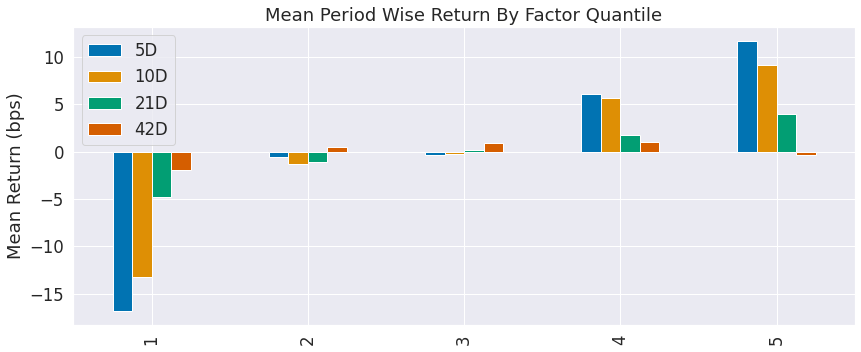

In [ ]:
create_summary_tear_sheet(alphalens_data)

## Predictive performance by factor quantiles -  Returns Analysis

As a first step, we would like to visualize the average period return by factor quantile. We can use the built-in function mean_return_by_quantile from the performance and plot_quantile_returns_bar from the plotting modules

In [ ]:
mean_return_by_q, std_err = mean_return_by_quantile(alphalens_data)
mean_return_by_q_norm = mean_return_by_q.apply(lambda x: x.add(1).pow(1/int(x.name[:-1])).sub(1))

### Mean Return by Holding Period and Quintile

The result is a bar chart that breaks down the mean of the forward returns for the four different holding periods based on the quintile of the factor signal. As you can see, the bottom quintiles yielded markedly more negative results than the top quintiles, except for the longest holding period:


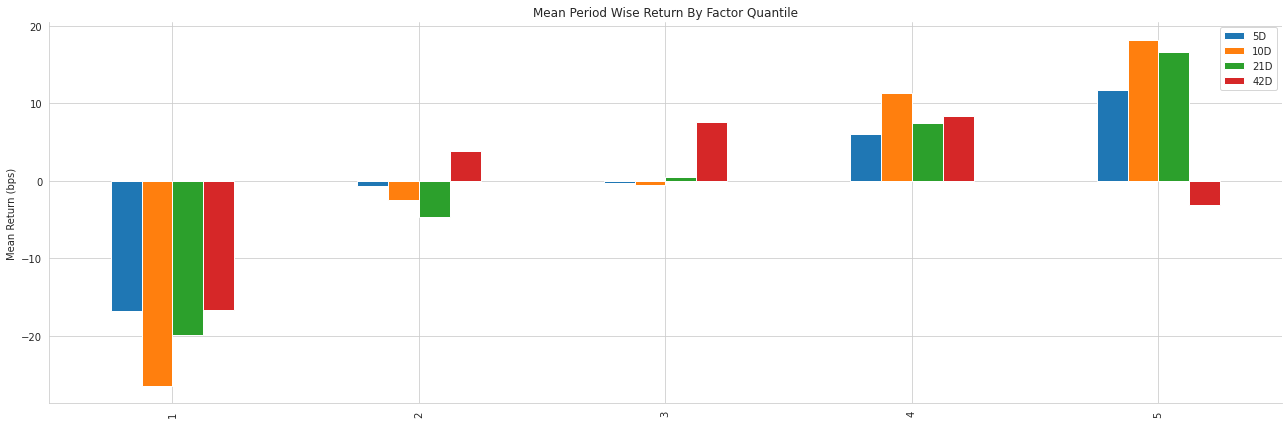

In [ ]:
plot_quantile_returns_bar(mean_return_by_q)
plt.tight_layout()
sns.despine();

The 10D holding period provides slightly better results for the first and fourth quartiles. We would also like to see the performance over time of investments driven by each of the signal quintiles. 

We will calculate daily, as opposed to average returns for the 5D holding period, and alphalens will adjust the period returns to account for the mismatch between daily signals and a longer holding period (for details, see docs):

In [ ]:
mean_return_by_q_daily, std_err = mean_return_by_quantile(alphalens_data, by_date=True)

### Cumulative 5D Return

The resulting line plot shows that, for most of this three-year period, the top two quintiles significantly outperformed the bottom two quintiles. However, as suggested by the previous plot, signals by the fourth quintile produced a better performance than those by the top quintile

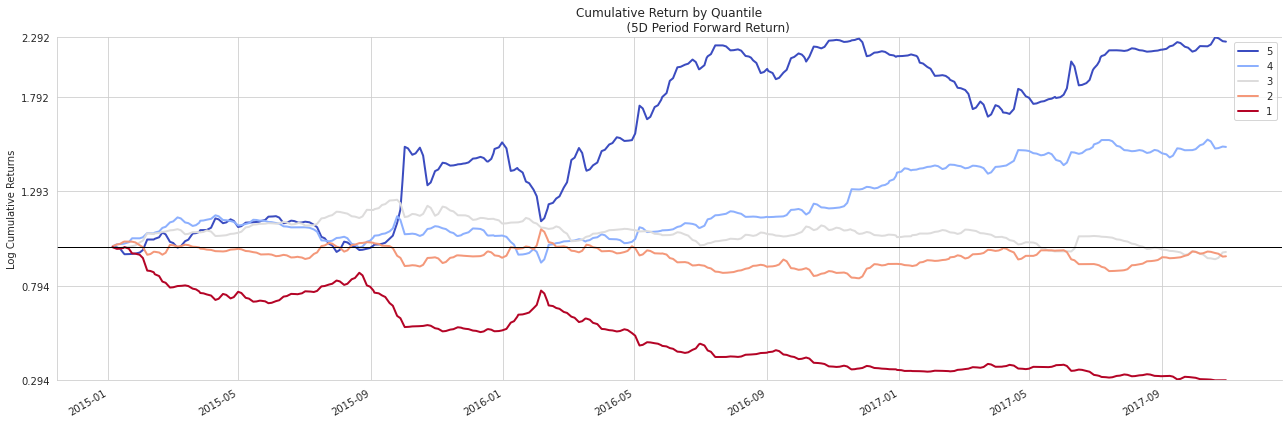

In [ ]:
plot_cumulative_returns_by_quantile(mean_return_by_q_daily['5D'], period='5D', freq=None)
plt.tight_layout()
sns.despine();

### Return Distribution by Holding Period and Quintile

This distributional plot highlights that the range of daily returns is fairly wide and, despite different means, the separation of the distributions is very limited so that, on any given day, the differences in performance between the different quintiles may be rather limited:

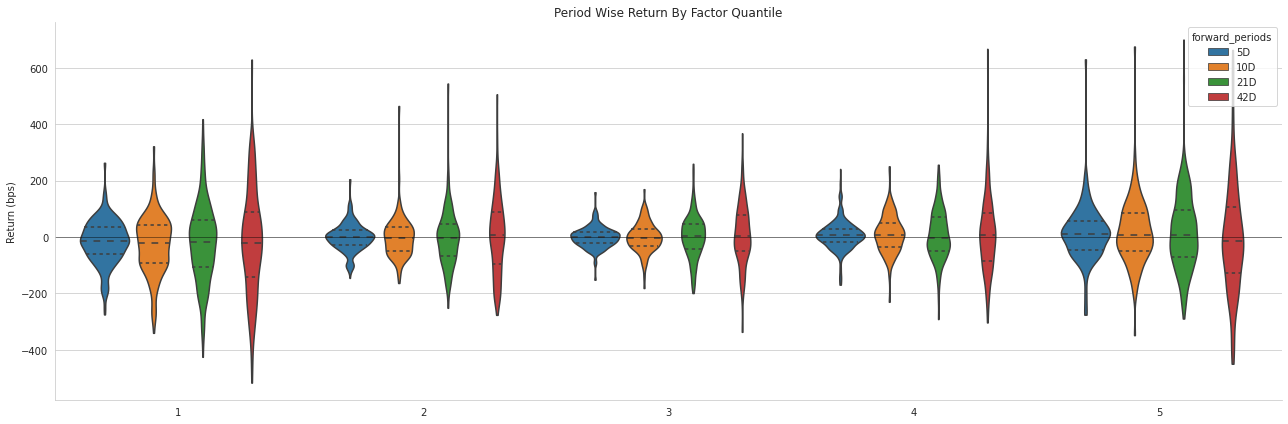

In [ ]:
plot_quantile_returns_violin(mean_return_by_q_daily)
plt.tight_layout()
sns.despine();

#### 정보 계수
- ML은 예측 목적을 최적화하는 것
- 정보 비율(IR, Information Ratio)는 알파를 추적 리스크로 나눈 것으로, 리스크 1 유닛당 평균 초과 수익률을 측정함
- 벤치마크가 무위험 이자율이면 IR은 잘 알려진 샤프 비율(Sharp ratio)에 상응

## Information Coefficient

Most of this book is about the design of alpha factors using ML models. ML is about optimizing some predictive objective, and in this section, we will introduce the key metrics used to measure the performance of an alpha factor. We will define alpha as the average return in excess of a benchmark.
This leads to the information ratio (IR) that measures the average excess return per unit of risk taken by dividing alpha by the tracking risk. When the benchmark is the risk-free rate, the IR corresponds to the well-known Sharpe ratio, and we will highlight crucial statistical measurement issues that arise in the typical case when returns are not normally distributed. We will also explain the fundamental law of active management that breaks the IR down into a combination of forecasting skill and a strategy's ability to effectively leverage the forecasting skills.

### 5D Information Coefficient (Rolling Average)

The goal of alpha factors is the accurate directional prediction of future returns. Hence, a natural performance measure is the correlation between an alpha factor's predictions and the forward returns of the target assets. 

It is better to use the non-parametric Spearman rank correlation coefficient that measures how well the relationship between two variables can be described using a monotonic function, as opposed to the Pearson correlation that measures the strength of a linear relationship. 

We can obtain the information coefficient using alphalens, which relies on `scipy.stats.spearmanr` under the hood. 

The `factor_information_coefficient` function computes the period-wise correlation and plot_ic_ts creates a time-series plot with one-month moving average:

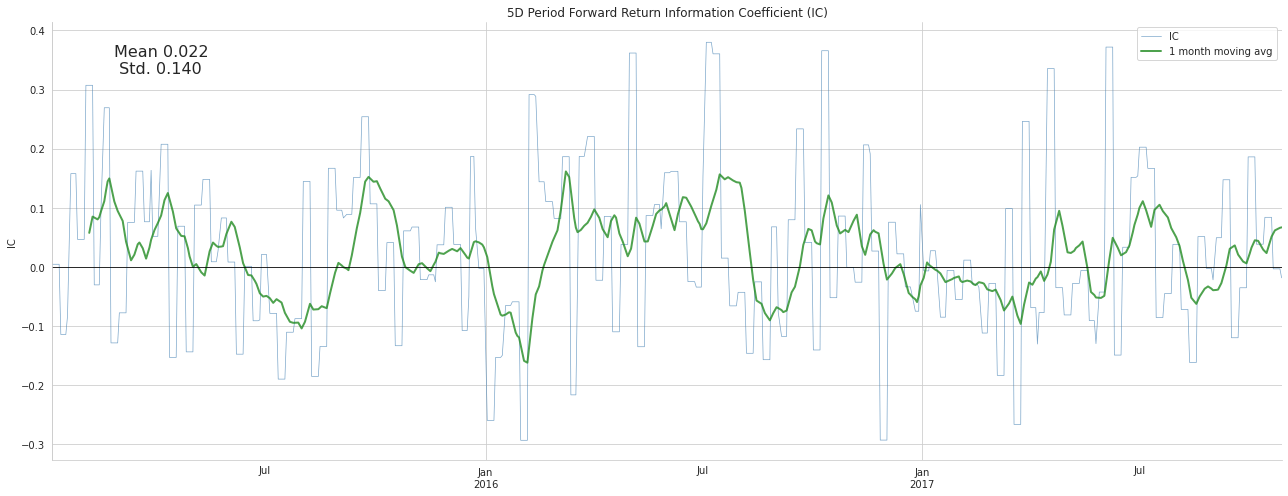

In [ ]:
ic = factor_information_coefficient(alphalens_data)
plot_ic_ts(ic[['5D']])
plt.tight_layout()
sns.despine();

### Information Coefficient by Holding Period

This time series plot shows extended periods with significantly positive moving-average IC. An IC of 0.05 or even 0.1 allows for significant outperformance if there are sufficient opportunities to apply this forecasting skill, as the fundamental law of active management will illustrate:

A plot of the annual mean IC highlights how the factor's performance was historically uneven:

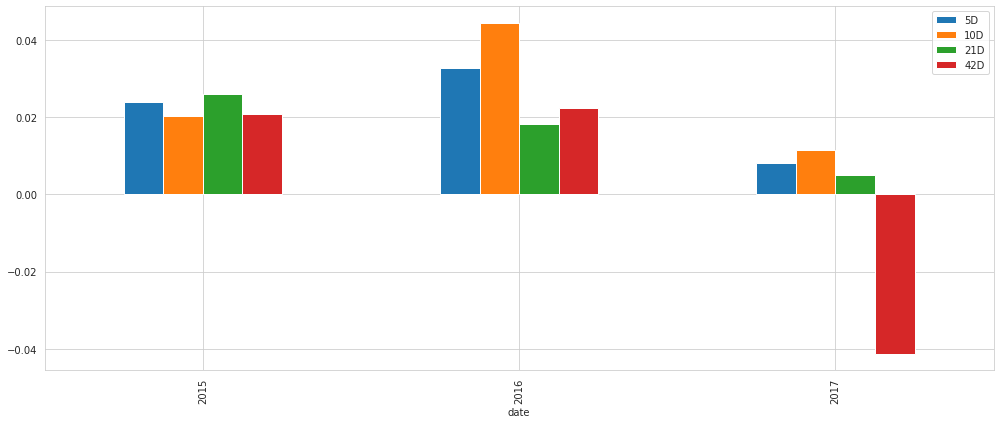

In [ ]:
ic = factor_information_coefficient(alphalens_data)
ic_by_year = ic.resample('A').mean()
ic_by_year.index = ic_by_year.index.year
ic_by_year.plot.bar(figsize=(14, 6))
plt.tight_layout();

## Turnover Tear Sheet

Factor turnover measures how frequently the assets associated with a given quantile change, that is, how many trades are required to adjust a portfolio to the sequence of signals. More specifically, it measures the share of assets currently in a factor quantile that was not in that quantile in the last period.

Turnover Analysis


5D    10D    21D    42D
Quantile 1 Mean Turnover   0.411  0.590  0.830  0.831
Quantile 2 Mean Turnover   0.645  0.740  0.804  0.812
Quantile 3 Mean Turnover   0.679  0.765  0.808  0.812
Quantile 4 Mean Turnover   0.642  0.741  0.810  0.814
Quantile 5 Mean Turnover   0.394  0.569  0.811  0.819

5D    10D    21D    42D
Mean Factor Rank Autocorrelation  0.713  0.454 -0.013 -0.017

<Figure size 432x288 with 0 Axes>

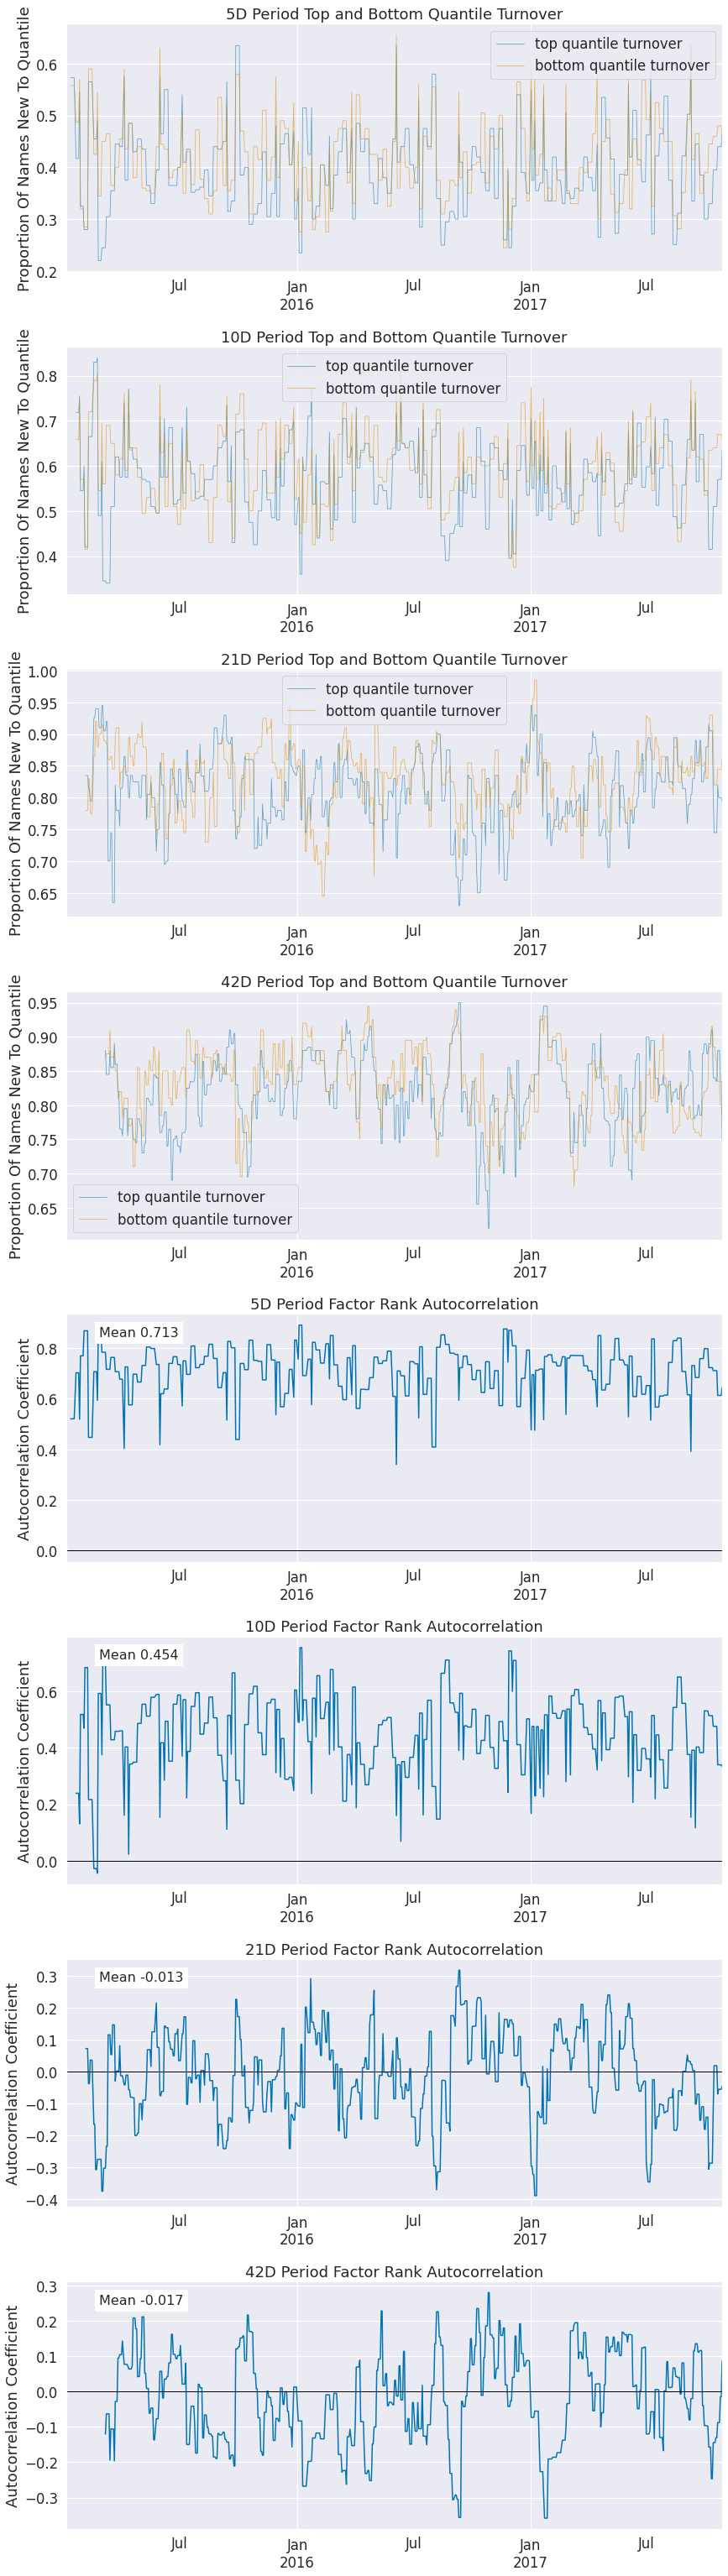

In [ ]:
create_turnover_tear_sheet(alphalens_data);